# 1.Load the data

Since the original dataset is too big (over 50 GIB), use the feather-format data from @Munum https://www.kaggle.com/datasets/munumbutt/amexfeather 

In [53]:
pip install optuna

     -------------------------------------- 308.2/308.2 kB 4.7 MB/s eta 0:00:00
     ------------------------------------- 209.8/209.8 kB 13.3 MB/s eta 0:00:00
     ---------------------------------------- 81.0/81.0 kB ? eta 0:00:00
     ---------------------------------------- 78.4/78.4 kB ? eta 0:00:00
     ---------------------------------------- 78.6/78.6 kB ? eta 0:00:00
     ---------------------------------------- 49.5/49.5 kB ? eta 0:00:00
     -------------------------------------- 147.1/147.1 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 95.2/95.2 kB ? eta 0:00:00
     ---------------------------------------- 112.4/112.4 kB ? eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11106 sha256=311ac9909b8e602c662f754bab06ac693b4ec87c0e65a8c7039c73ba865d1fca
  Stored in directory: c:\users\mingl\appdata\local\pip\cache\

In [1]:
import numpy as np
import pandas as pd
import feather
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# load the train_labels dataset and examine the data

train_label_df = pd.read_csv('train_labels.csv')
train_label_df.head()

customer_ID  target
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0
1  00000fd6641609c6ece5454664794f0340ad84dddce9a2...       0
2  00001b22f846c82c51f6e3958ccd81970162bae8b007e8...       0
3  000041bdba6ecadd89a52d11886e8eaaec9325906c9723...       0
4  00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...       0

In [3]:
train_label_df.shape

(458913, 2)

In [4]:
# load the train_data dataset and examine the data

train_data_df = pd.read_feather('train_data.ftr')
train_data_df.head()

customer_ID        S_2       P_2  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f... 2017-03-09  0.938477   
1  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f... 2017-04-07  0.936523   
2  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f... 2017-05-28  0.954102   
3  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f... 2017-06-13  0.960449   
4  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f... 2017-07-16  0.947266   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  ...  \
0  0.001734  0.008728  1.006836  0.009224  0.124023  0.008774  0.004707  ...   
1  0.005775  0.004925  1.000977  0.006153  0.126709  0.000798  0.002714  ...   
2  0.091492  0.021652  1.009766  0.006817  0.123962  0.007599  0.009422  ...   
3  0.002455  0.013687  1.002930  0.001372  0.117188  0.000685  0.005531  ...   
4  0.002483  0.015190  1.000977  0.007607  0.117310  0.004654  0.009308  ...   

   D_137  D_138     D_139     D_140     D_141  D_142     D_143     D_144  \
0    NaN    NaN  0.002426  0.003706  0.003819    NaN  0.000569  0.000610   
1    NaN    NaN  0.003956  0.003166  0.005032    NaN  0.009575  0.005493   
2    NaN    NaN  0.003269  0.007328  0.000427    NaN  0.003429  0.006985   
3    NaN    NaN  0.006119  0.004517  0.003201    NaN  0.008423  0.006527   
4    NaN    NaN  0.003672  0.004944  0.008888    NaN  0.001670  0.008125   

      D_145  target  
0  0.002674       0  
1  0.009216       0  
2  0.002604       0  
3  0.009598       0  
4  0.009827       0  

[5 rows x 191 columns]

In [5]:
train_data_df.shape

(5531451, 191)

In [6]:
train_data_df.info(max_cols=200, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Data columns (total 191 columns):
 #    Column       Non-Null Count    Dtype         
---   ------       --------------    -----         
 0    customer_ID  5531451 non-null  object        
 1    S_2          5531451 non-null  datetime64[ns]
 2    P_2          5485466 non-null  float16       
 3    D_39         5531451 non-null  float16       
 4    B_1          5531451 non-null  float16       
 5    B_2          5529435 non-null  float16       
 6    R_1          5531451 non-null  float16       
 7    S_3          4510907 non-null  float16       
 8    D_41         5529435 non-null  float16       
 9    B_3          5529435 non-null  float16       
 10   D_42         791314 non-null   float16       
 11   D_43         3873055 non-null  float16       
 12   D_44         5257132 non-null  float16       
 13   B_4          5531451 non-null  float16       
 14   D_45         5529434 non-null  float16       
 1

In [7]:
# load the test dataset

test_data_df = pd.read_feather('test_data.ftr')

test_data_df.head()

customer_ID        S_2       P_2  \
0  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-02-19  0.631348   
1  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-03-25  0.586914   
2  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-04-25  0.608887   
3  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-05-20  0.614746   
4  00000469ba478561f23a92a868bd366de6f6527a684c9a... 2019-06-15  0.591797   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  ...  \
0  0.001912  0.010727  0.814453  0.007545  0.168701  0.009972  0.002348  ...   
1  0.005276  0.011024  0.811035  0.001817  0.241333  0.000166  0.009132  ...   
2  0.003326  0.016388  1.004883  0.000114  0.267090  0.004196  0.004192  ...   
3  0.009064  0.021667  0.816406  0.009720  0.188965  0.004124  0.015327  ...   
4  0.238770  0.015930  0.810547  0.002026  0.180054  0.000731  0.011284  ...   

   D_136  D_137  D_138     D_139     D_140     D_141  D_142     D_143  \
0    NaN    NaN    NaN       NaN  0.004669       NaN    NaN       NaN   
1    NaN    NaN    NaN  0.000142  0.004940  0.009018    NaN  0.003695   
2    NaN    NaN    NaN  0.000074  0.002113  0.004658    NaN  0.003155   
3    NaN    NaN    NaN  0.004742  0.006393  0.002890    NaN  0.006042   
4    NaN    NaN    NaN  0.008133  0.004330  0.008385    NaN  0.001008   

      D_144     D_145  
0  0.008278       NaN  
1  0.003754  0.001460  
2  0.002155  0.006481  
3  0.005207  0.007858  
4  0.007420  0.009468  

[5 rows x 190 columns]

In [8]:
test_data_df.shape

(11363762, 190)

In [9]:
test_data_df.info(max_cols=200, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363762 entries, 0 to 11363761
Data columns (total 190 columns):
 #    Column       Non-Null Count     Dtype         
---   ------       --------------     -----         
 0    customer_ID  11363762 non-null  object        
 1    S_2          11363762 non-null  datetime64[ns]
 2    P_2          11303884 non-null  float16       
 3    D_39         11363762 non-null  float16       
 4    B_1          11363762 non-null  float16       
 5    B_2          11360845 non-null  float16       
 6    R_1          11363762 non-null  float16       
 7    S_3          9622797 non-null   float16       
 8    D_41         11360845 non-null  float16       
 9    B_3          11360845 non-null  float16       
 10   D_42         1357583 non-null   float16       
 11   D_43         7951136 non-null   float16       
 12   D_44         10825597 non-null  float16       
 13   B_4          11363762 non-null  float16       
 14   D_45         11360784 non-null

# 2.Examine the meta data

Columns in the dataset are divided by the organisers in the following groups:

D_*: Delinquency variables

S_*: Spend variables

P_*: Payment variables

B_*: Balance variables

R_*: Risk variables

We will create a meta dataframe to document how we will process and clean the data.

In [10]:
train_meta = pd.DataFrame({
    'variable_names':train_data_df.columns,
    'data_role':'',
    'variable_types':'',
    'data_types':(x for x in train_data_df.dtypes),
    'count_of_unique_values':'',
    'count_of_missing_values':'',
    'percentage_of_missing_values(%)':''
})

train_meta.head()

variable_names data_role variable_types      data_types  \
0    customer_ID                                   object   
1            S_2                           datetime64[ns]   
2            P_2                                  float16   
3           D_39                                  float16   
4            B_1                                  float16   

  count_of_unique_values count_of_missing_values  \
0                                                  
1                                                  
2                                                  
3                                                  
4                                                  

  percentage_of_missing_values(%)  
0                                  
1                                  
2                                  
3                                  
4

In [11]:
for index, row in train_meta.iterrows():
    
    row['count_of_unique_values'] = len(train_data_df[row[0]].unique())
    row['count_of_missing_values'] = train_data_df[row[0]].isnull().sum()
    row['percentage_of_missing_values(%)'] = round(train_data_df[row[0]].isnull().sum()/train_data_df.shape[0]*100,2)
    
    if row[0] == 'customer_ID':
        row['data_role'] = 'order(non_feature)'
    elif row[0] == 'S_2':
        row['data_role'] = 'date'
    elif row[0] == 'target':
        row['data_role'] = 'target'
    else:
        row['data_role'] = 'feature'

In [12]:
pd.set_option('display.max_rows',None)
train_meta.sort_values(by=['percentage_of_missing_values(%)','count_of_missing_values'],ascending = False)

variable_names           data_role variable_types      data_types  \
108           D_87             feature                        float16   
111           D_88             feature                        float16   
146          D_108             feature                        float16   
148          D_110             feature                        float16   
149          D_111             feature                        float16   
150           B_39             feature                        float16   
74            D_73             feature                        float16   
172           B_42             feature                        float16   
178          D_134             feature                        float16   
179          D_135             feature                        float16   
180          D_136             feature                        float16   
181          D_137             feature                        float16   
182          D_138             feature                        float16   
87             R_9             feature                        float16   
104           B_29             feature                        float16   
139          D_106             feature                        float16   
175          D_132             feature                        float16   
20            D_49             feature                        float16   
143           R_26             feature                        float16   
78            D_76             feature                        float16   
60            D_66             feature                       category   
10            D_42             feature                        float16   
186          D_142             feature                        float16   
31            D_53             feature                        float16   
94            D_82             feature                        float16   
24            D_50             feature                        float16   
57            B_17             feature                        float16   
138          D_105             feature                        float16   
41            D_56             feature                        float16   
45             S_9             feature                        float16   
81            D_77             feature                        float16   
11            D_43             feature                        float16   
153           S_27             feature                        float16   
17            D_46             feature                        float16   
7              S_3             feature                        float16   
37             S_7             feature                        float16   
52            D_62             feature                        float16   
19            D_48             feature                        float16   
49            D_61             feature                        float16   
29             P_3             feature                        float16   
12            D_44             feature                        float16   
84            D_78             feature                        float16   
62            D_68             feature                       category   
67            D_69             feature                        float16   
99            D_83             feature                        float16   
40            D_55             feature                        float16   
154          D_113             feature                        float16   
155          D_114             feature                       category   
156          D_115             feature                        float16   
157          D_116             feature                       category   
158          D_117             feature                       category   
159          D_118             feature                        float16   
160          D_119             feature                        float16   
161          D_120             feature                       c

We can see that many columns contain large percentage of null values. According to the train_meta, variables D_87, D_88, D_108, D_111, D_110, B_39, D_73, B_42, D_134, D_135, D_137, D_138, D_136, R_9, B_29, D_106, D_132, D_49, R_26, D_76, D_66, D_42, D_142, D_53, D_82, D_50, B_17, D_105, D_56, S_9, and D_77 have over 40% of nulls.

In [13]:
test_meta = pd.DataFrame({
    'variable_names':test_data_df.columns,
    'data_role':'',
    'variable_types':'',
    'data_types':(x for x in test_data_df.dtypes),
    'count_of_unique_values':'',
    'count_of_missing_values':'',
    'percentage_of_missing_values(%)':''
})

test_meta.head()

variable_names data_role variable_types      data_types  \
0    customer_ID                                   object   
1            S_2                           datetime64[ns]   
2            P_2                                  float16   
3           D_39                                  float16   
4            B_1                                  float16   

  count_of_unique_values count_of_missing_values  \
0                                                  
1                                                  
2                                                  
3                                                  
4                                                  

  percentage_of_missing_values(%)  
0                                  
1                                  
2                                  
3                                  
4

In [14]:
for index, row in test_meta.iterrows():
    
    row['count_of_unique_values'] = len(test_data_df[row[0]].unique())
    row['count_of_missing_values'] = test_data_df[row[0]].isnull().sum()
    row['percentage_of_missing_values(%)'] = round(test_data_df[row[0]].isnull().sum()/test_data_df.shape[0]*100,2)
    
    if row[0] == 'customer_ID':
        row['data_role'] = 'order(non_feature)'
    elif row[0] == 'S_2':
        row['data_role'] = 'date'
    else:
        row['data_role'] = 'feature'

In [15]:
pd.set_option('display.max_rows',None)
test_meta.sort_values(by=['percentage_of_missing_values(%)','count_of_missing_values'],ascending = False)

variable_names           data_role variable_types      data_types  \
108           D_87             feature                        float16   
111           D_88             feature                        float16   
146          D_108             feature                        float16   
148          D_110             feature                        float16   
149          D_111             feature                        float16   
150           B_39             feature                        float16   
74            D_73             feature                        float16   
172           B_42             feature                        float16   
178          D_134             feature                        float16   
179          D_135             feature                        float16   
180          D_136             feature                        float16   
181          D_137             feature                        float16   
182          D_138             feature                        float16   
87             R_9             feature                        float16   
78            D_76             feature                        float16   
60            D_66             feature                       category   
139          D_106             feature                        float16   
175          D_132             feature                        float16   
20            D_49             feature                        float16   
10            D_42             feature                        float16   
143           R_26             feature                        float16   
186          D_142             feature                        float16   
104           B_29             feature                        float16   
94            D_82             feature                        float16   
31            D_53             feature                        float16   
24            D_50             feature                        float16   
57            B_17             feature                        float16   
138          D_105             feature                        float16   
41            D_56             feature                        float16   
81            D_77             feature                        float16   
45             S_9             feature                        float16   
11            D_43             feature                        float16   
153           S_27             feature                        float16   
17            D_46             feature                        float16   
52            D_62             feature                        float16   
7              S_3             feature                        float16   
37             S_7             feature                        float16   
19            D_48             feature                        float16   
49            D_61             feature                        float16   
40            D_55             feature                        float16   
144           R_27             feature                        float16   
12            D_44             feature                        float16   
84            D_78             feature                        float16   
29             P_3             feature                        float16   
123           D_91             feature                        float16   
62            D_68             feature                       category   
67            D_69             feature                        float16   
99            D_83             feature                        float16   
154          D_113             feature                        float16   
155          D_114             feature                       category   
156          D_115             feature                        float16   
157          D_116             feature                       category   
158          D_117             feature                       category   
159          D_118             feature                        

The test dataset also contains a large quantity of null values.

## 2.1.1 Identify missing Values

In [16]:
train_label_df.isnull().sum()

customer_ID    0
target         0
dtype: int64

The label of train data have no null. Let's check the train dataset.

In [17]:
train_null_cols = train_meta[train_meta['count_of_missing_values'] > 0.0]['variable_names'].to_list()
train_null_cols

['P_2',
 'B_2',
 'S_3',
 'D_41',
 'B_3',
 'D_42',
 'D_43',
 'D_44',
 'D_45',
 'D_46',
 'D_48',
 'D_49',
 'B_6',
 'B_8',
 'D_50',
 'D_52',
 'P_3',
 'D_53',
 'D_54',
 'S_7',
 'D_55',
 'D_56',
 'B_13',
 'S_9',
 'D_59',
 'D_61',
 'B_15',
 'D_62',
 'B_16',
 'B_17',
 'B_19',
 'D_66',
 'B_20',
 'D_68',
 'D_69',
 'B_22',
 'D_70',
 'D_72',
 'D_73',
 'D_74',
 'D_76',
 'R_7',
 'D_77',
 'B_25',
 'B_26',
 'D_78',
 'D_79',
 'R_9',
 'D_80',
 'B_27',
 'D_81',
 'D_82',
 'R_12',
 'D_83',
 'R_14',
 'D_84',
 'B_29',
 'B_30',
 'D_87',
 'D_88',
 'R_20',
 'B_33',
 'D_89',
 'D_91',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_106',
 'D_107',
 'B_37',
 'R_26',
 'R_27',
 'B_38',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'B_39',
 'D_112',
 'B_40',
 'S_27',
 'D_113',
 'D_114',
 'D_115',
 'D_116',
 'D_117',
 'D_118',
 'D_119',
 'D_120',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_126',
 'D_128',
 'D_129',
 'B_41',
 'B_42',
 'D_130',
 'D_131',
 'D_132',
 'D_133',

In [18]:
missing_pairs = train_meta[['variable_names','percentage_of_missing_values(%)']].sort_values(by=['percentage_of_missing_values(%)'],ascending=False)

E:\Program Files\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Program Files\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


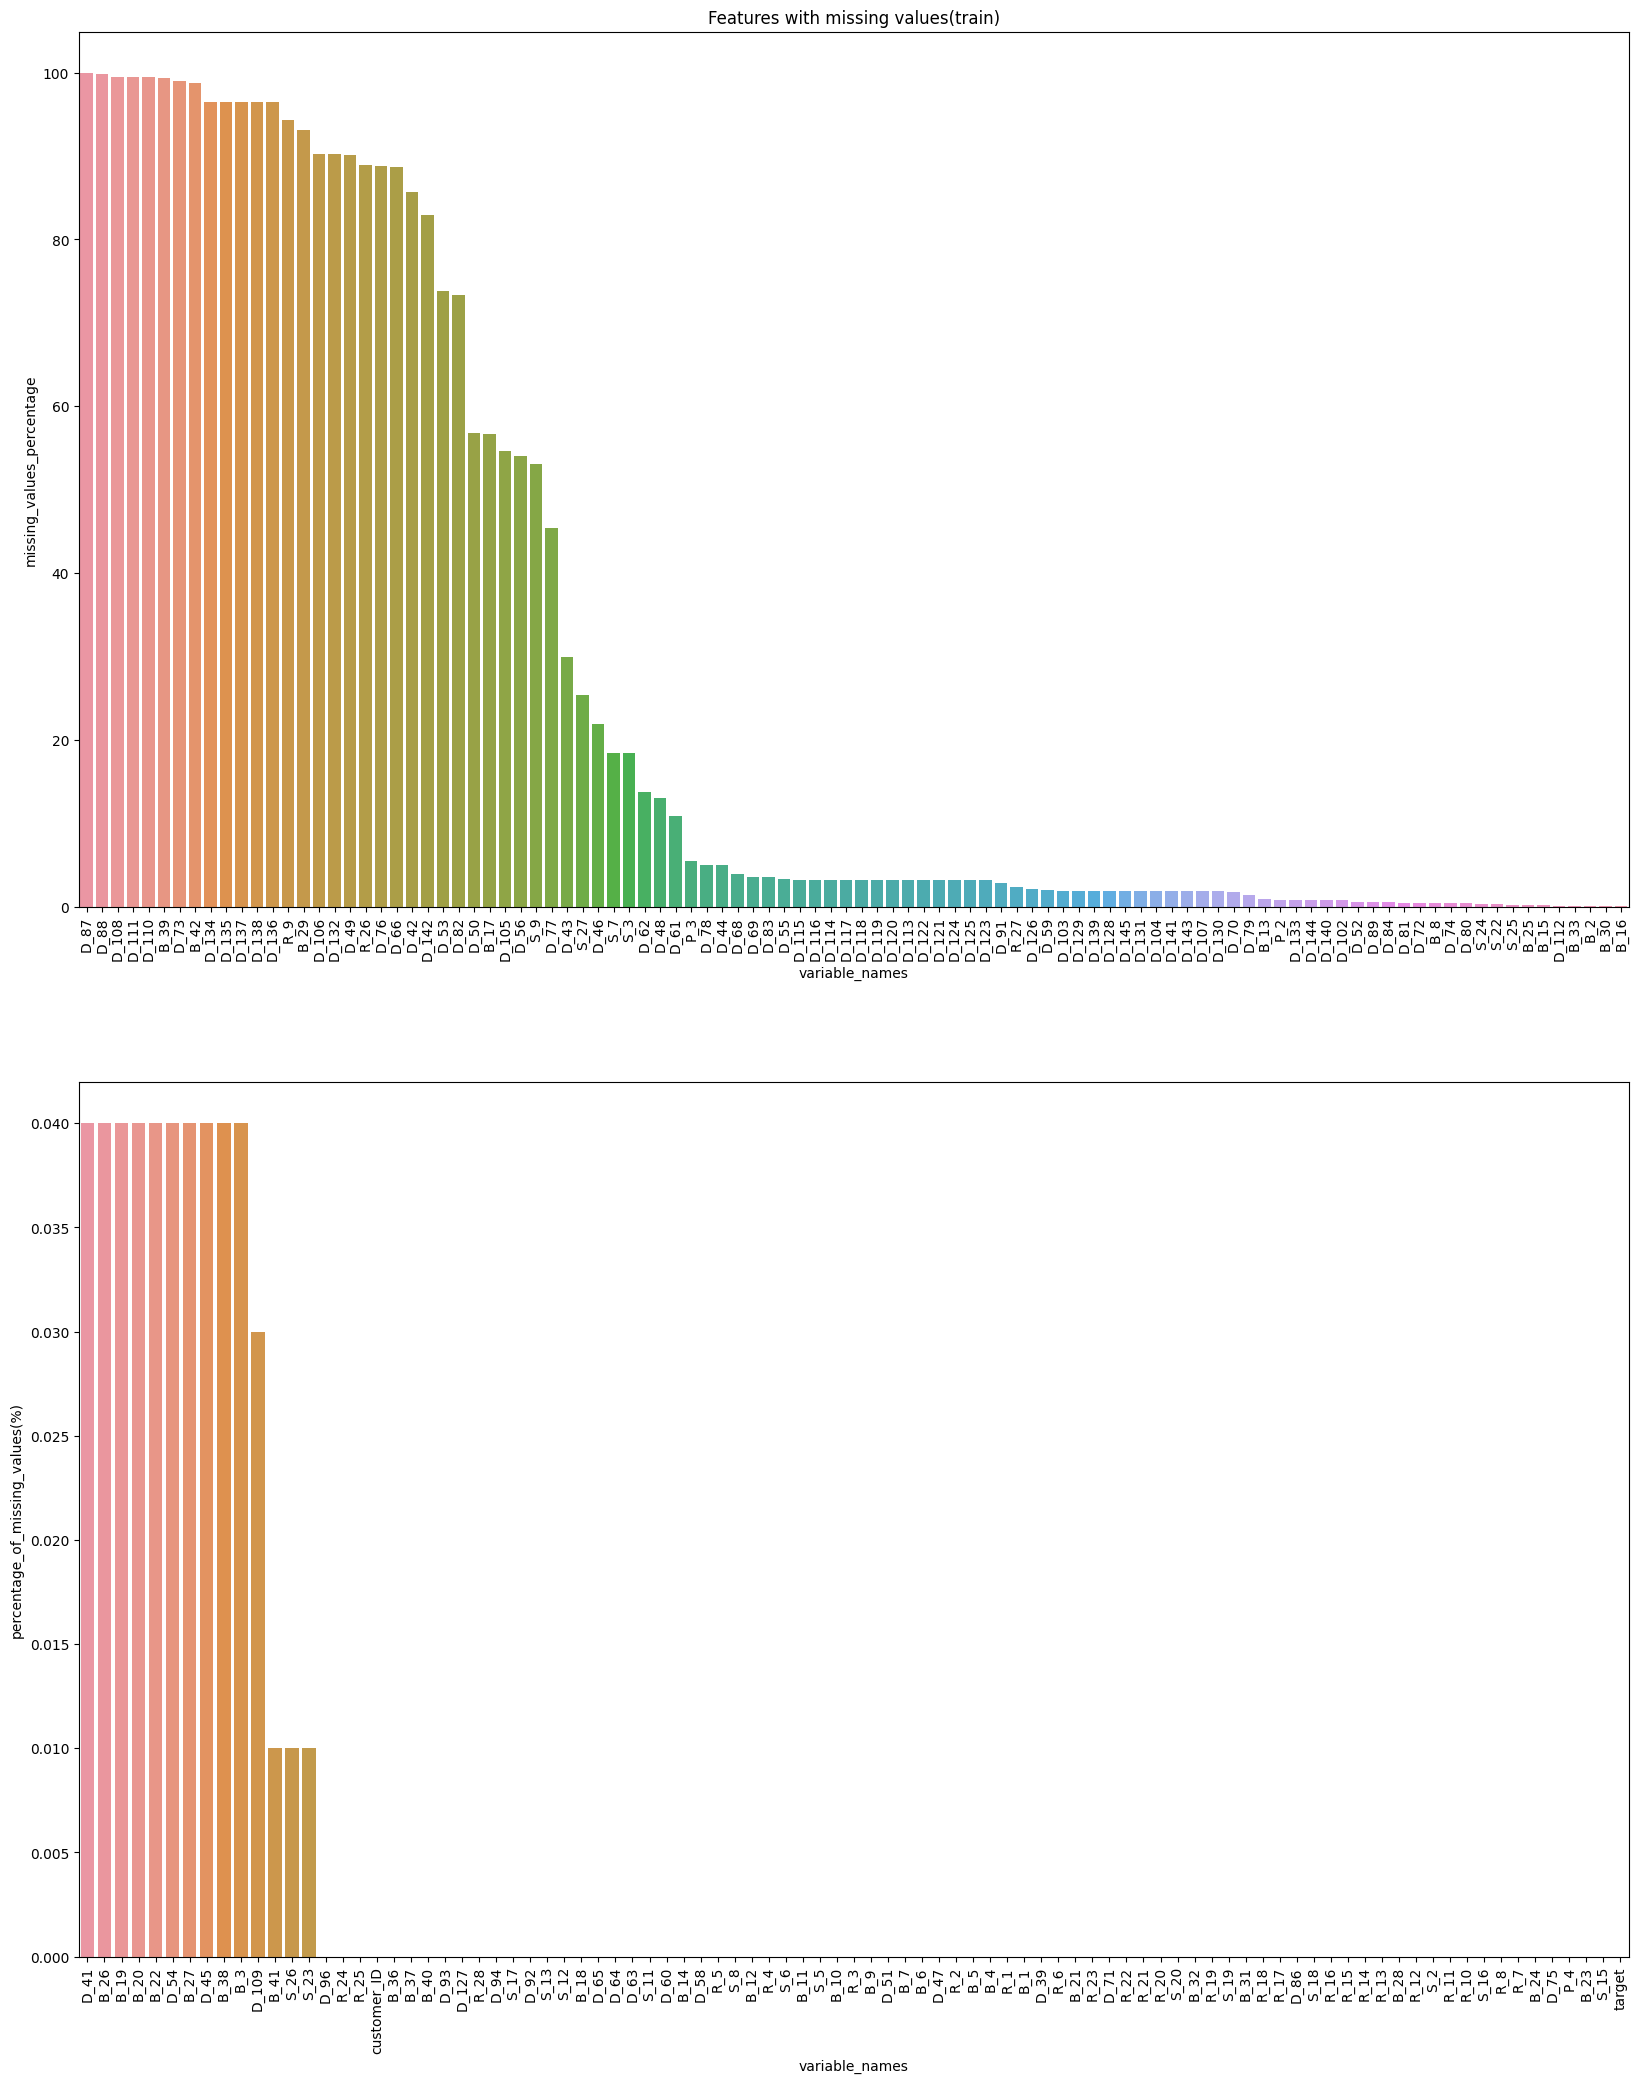

In [19]:
x_axis = missing_pairs['variable_names']
y_axis = missing_pairs['percentage_of_missing_values(%)']
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(2,1,figsize=(20,25))
sns.barplot(x_axis[:100],y_axis[:100],ax=ax[0])
sns.barplot(x_axis[100:],y_axis[100:],ax=ax[1])
ax[0].set_ylabel('missing_values_percentage')
ax[0].set_ylabel('missing_values_percentage')
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title('Features with missing values(train)')
plt.show()

How about the test dataset...

In [20]:
test_null_cols = test_meta[train_meta['count_of_missing_values'] > 0.0]['variable_names'].to_list()
test_null_cols

C:\Users\mingl\AppData\Local\Temp\ipykernel_77080\3269566632.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_null_cols = test_meta[train_meta['count_of_missing_values'] > 0.0]['variable_names'].to_list()


['P_2',
 'B_2',
 'S_3',
 'D_41',
 'B_3',
 'D_42',
 'D_43',
 'D_44',
 'D_45',
 'D_46',
 'D_48',
 'D_49',
 'B_6',
 'B_8',
 'D_50',
 'D_52',
 'P_3',
 'D_53',
 'D_54',
 'S_7',
 'D_55',
 'D_56',
 'B_13',
 'S_9',
 'D_59',
 'D_61',
 'B_15',
 'D_62',
 'B_16',
 'B_17',
 'B_19',
 'D_66',
 'B_20',
 'D_68',
 'D_69',
 'B_22',
 'D_70',
 'D_72',
 'D_73',
 'D_74',
 'D_76',
 'R_7',
 'D_77',
 'B_25',
 'B_26',
 'D_78',
 'D_79',
 'R_9',
 'D_80',
 'B_27',
 'D_81',
 'D_82',
 'R_12',
 'D_83',
 'R_14',
 'D_84',
 'B_29',
 'B_30',
 'D_87',
 'D_88',
 'R_20',
 'B_33',
 'D_89',
 'D_91',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_106',
 'D_107',
 'B_37',
 'R_26',
 'R_27',
 'B_38',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'B_39',
 'D_112',
 'B_40',
 'S_27',
 'D_113',
 'D_114',
 'D_115',
 'D_116',
 'D_117',
 'D_118',
 'D_119',
 'D_120',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_126',
 'D_128',
 'D_129',
 'B_41',
 'B_42',
 'D_130',
 'D_131',
 'D_132',
 'D_133',

In [21]:
missing_pairs = test_meta[['variable_names','percentage_of_missing_values(%)']].sort_values(by=['percentage_of_missing_values(%)'],ascending=False)

E:\Program Files\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Program Files\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


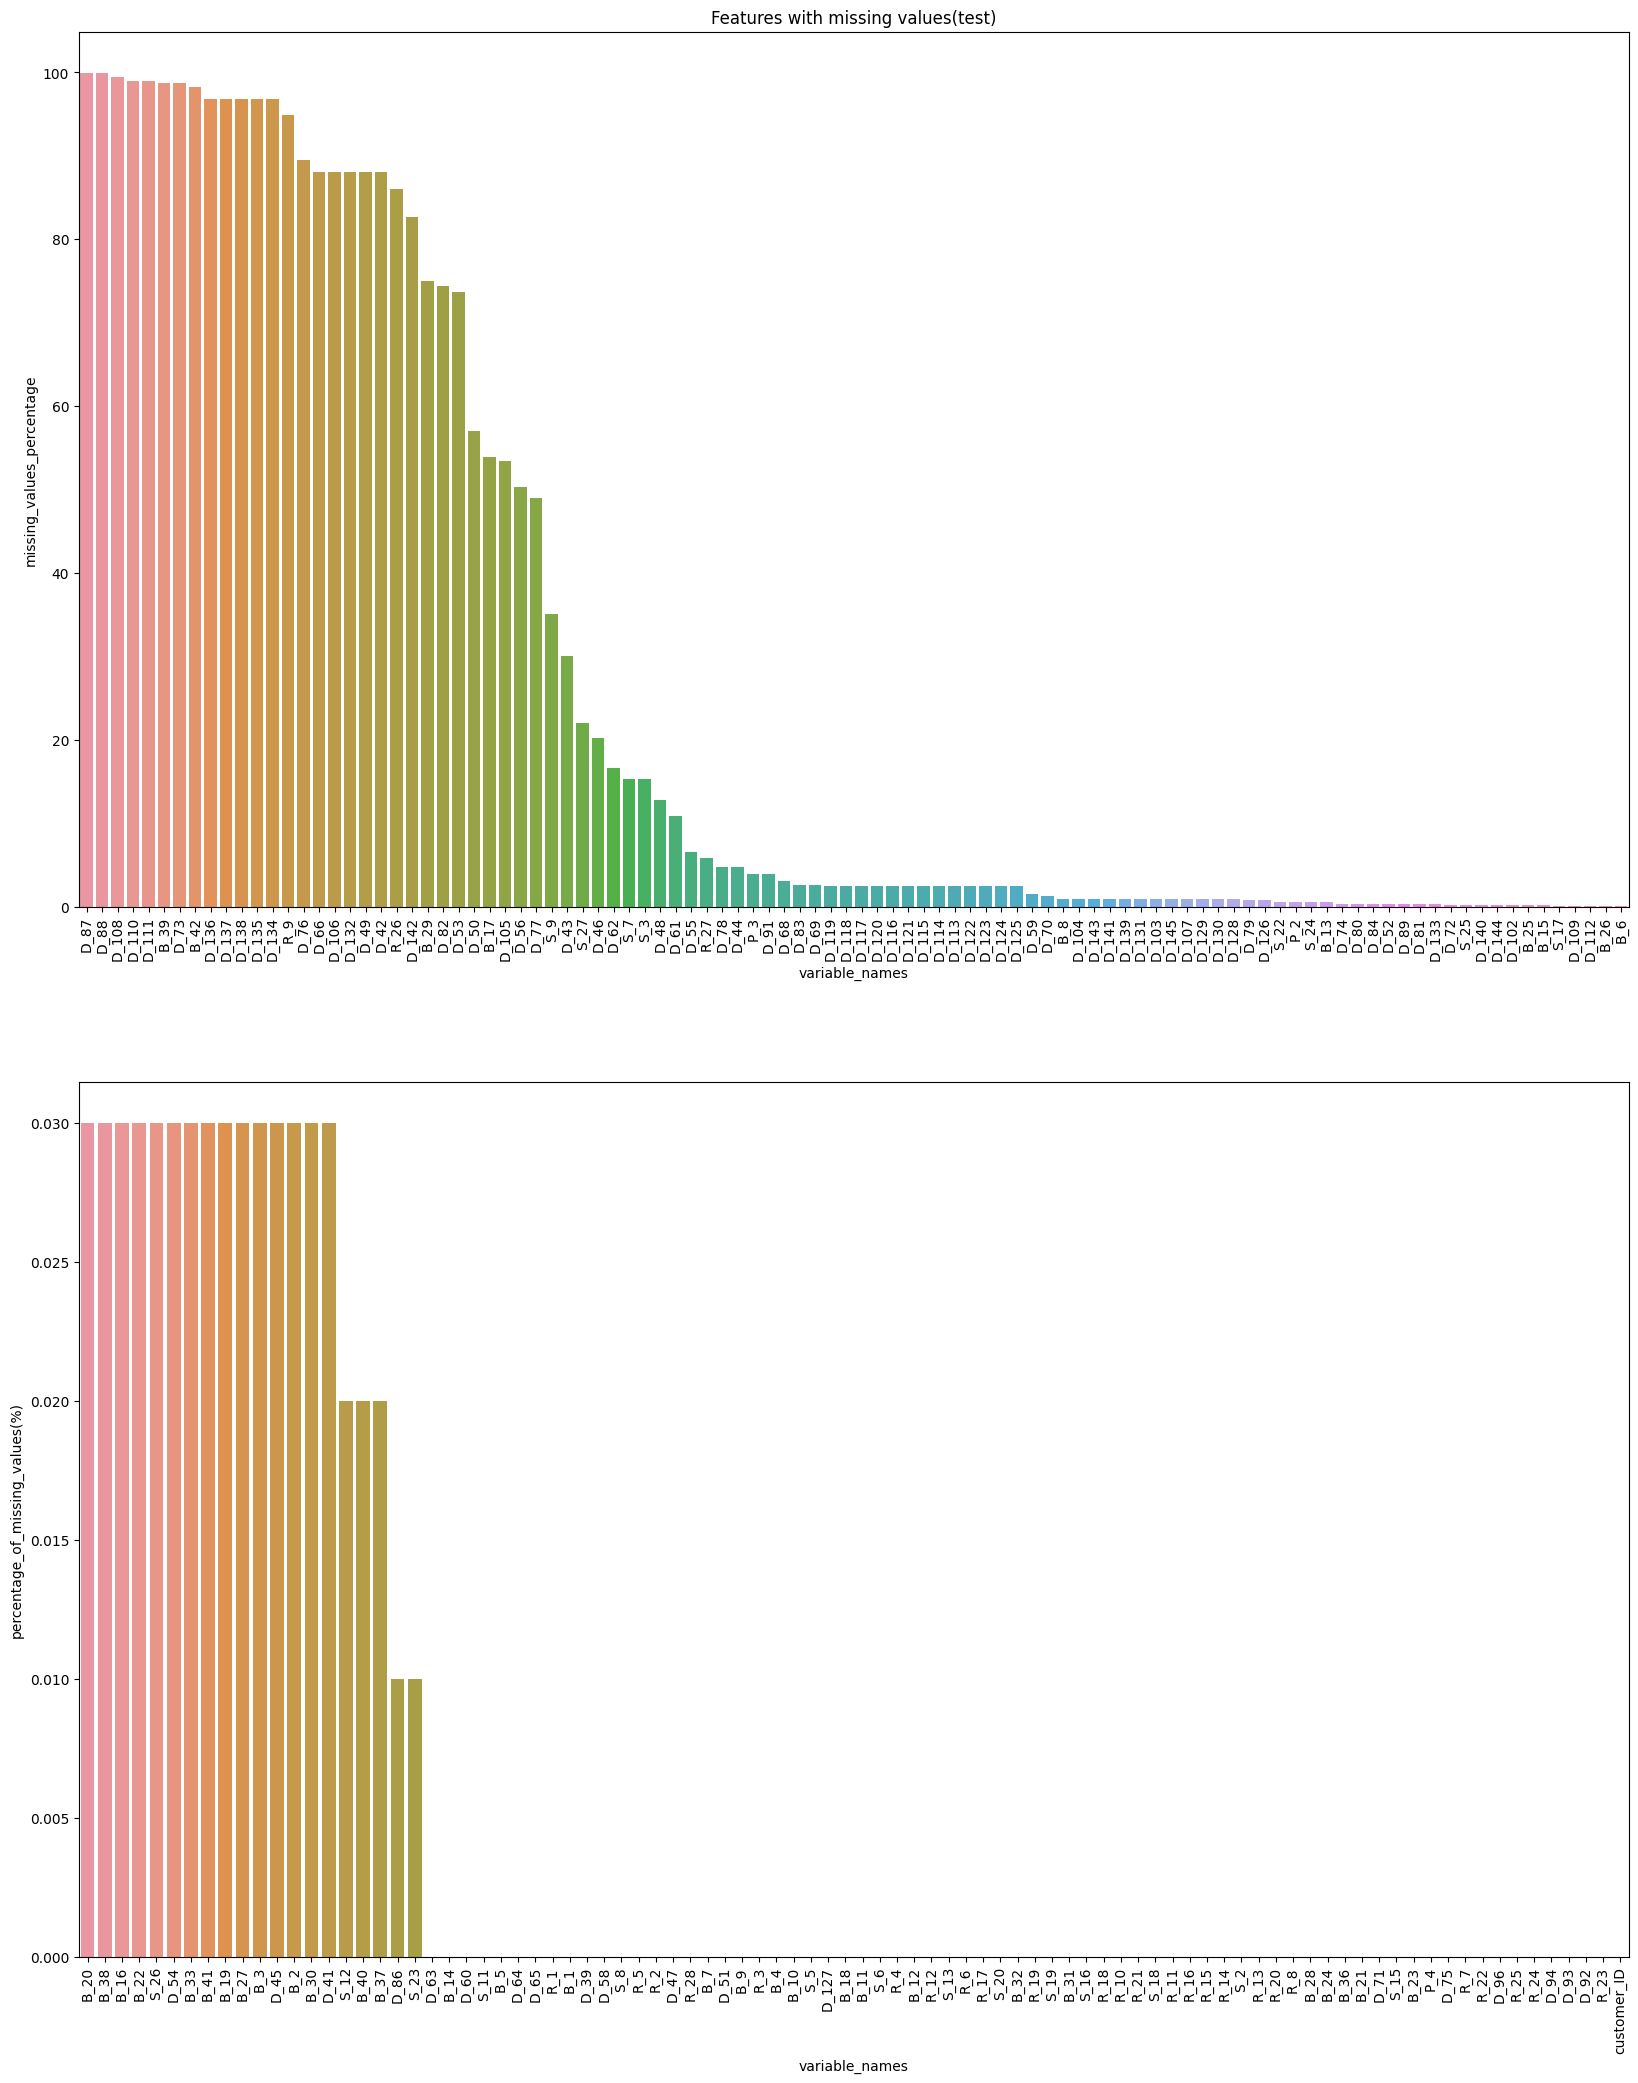

In [22]:
x_axis = missing_pairs['variable_names']
y_axis = missing_pairs['percentage_of_missing_values(%)']
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(2,1,figsize=(20,25))
sns.barplot(x_axis[:100],y_axis[:100],ax=ax[0])
sns.barplot(x_axis[100:],y_axis[100:],ax=ax[1])
ax[0].set_ylabel('missing_values_percentage')
ax[0].set_ylabel('missing_values_percentage')
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title('Features with missing values(test)')
plt.show()

## 2.1.2 Null Value Correlation with Defaults
Let's check to see if there is any strong correlation with null value features and the target column. To do this, we'll look at areas where features with nulls are strongly correlated with the target variable.

In [23]:
train_null_cols.append('target')
train_null_corr = train_data_df[train_null_cols].corr()
train_null_corr.sort_values(by='target')

P_2       B_2       S_3      D_41       B_3      D_42      D_43  \
P_2     1.000000  0.545082 -0.334633 -0.317395 -0.454154 -0.468156 -0.299000   
B_2     0.545082  1.000000 -0.235560 -0.257902 -0.713539 -0.090105 -0.142679   
B_33    0.528529  0.912814 -0.220800 -0.261644 -0.638143 -0.095252 -0.148191   
D_62    0.486856  0.396247 -0.245656 -0.117572 -0.304715 -0.292744 -0.146112   
D_77    0.433574  0.311139 -0.252003 -0.087886 -0.232308 -0.299664 -0.165755   
R_27    0.306364  0.163308 -0.185193 -0.064773 -0.102359 -0.271422 -0.242562   
D_45    0.342805  0.171037 -0.176044 -0.011086 -0.071076 -0.053427 -0.188801   
S_25    0.306165  0.263776 -0.089027 -0.173719 -0.258983 -0.124502 -0.101791   
P_3     0.399225  0.200521 -0.120602 -0.181242 -0.169021 -0.153022 -0.099879   
D_52    0.266481  0.203786 -0.170976 -0.044020 -0.141773 -0.082697 -0.118625   
D_112   0.297761  0.233874 -0.078315 -0.608747 -0.180020 -0.071377 -0.056972   
D_128   0.269621  0.099943 -0.166631 -0.006842 -0.047399 -0.183810 -0.114906   
D_115   0.263758  0.117714 -0.098863 -0.042189 -0.083567 -0.124474 -0.117412   
D_118   0.247554  0.109466 -0.090341 -0.035972 -0.078795 -0.115698 -0.107554   
D_121   0.278023  0.112565 -0.164682 -0.026624 -0.069683 -0.048136 -0.120141   
D_119   0.246191  0.108113 -0.089615 -0.035798 -0.078025 -0.115905 -0.106687   
D_122   0.220070  0.102984 -0.131845 -0.023026 -0.063626 -0.121885 -0.093000   
D_56    0.157072  0.157797 -0.163976 -0.004062 -0.115539 -0.204390 -0.050082   
D_54    0.212834  0.094932 -0.057805 -0.552800 -0.074838 -0.060047 -0.028156   
D_129   0.208978  0.042424 -0.112839  0.003942 -0.008973 -0.149761 -0.082064   
R_12    0.175901  0.080145 -0.087297 -0.181912 -0.082619 -0.069201 -0.079763   
D_76    0.160525  0.186129 -0.106834 -0.040528 -0.150648 -0.169541 -0.021206   
D_91    0.138387  0.157855 -0.128027 -0.023297 -0.101078 -0.070700 -0.041323   
B_42    0.142848  0.138958 -0.104766 -0.029530 -0.112971 -0.100478 -0.065022   
D_73    0.121438  0.021498 -0.142710  0.028993  0.018571 -0.102100  0.012692   
D_132   0.081430 -0.014092 -0.072965  0.024388  0.070965 -0.067660 -0.080931   
B_39    0.066597  0.014507 -0.016754 -0.002055 -0.027085 -0.365479 -0.013213   
D_50    0.086473  0.073353 -0.056617 -0.012050 -0.054458 -0.068465 -0.023135   
D_142   0.106109  0.019709 -0.076684  0.003000  0.008902 -0.058362 -0.050938   
S_26    0.038964  0.060158 -0.068158  0.013127 -0.038440 -0.067367 -0.008167   
B_6     0.050476  0.057862 -0.026431 -0.018549 -0.047736 -0.013847 -0.021354   
D_105   0.055775 -0.026751 -0.025195  0.029715  0.050199 -0.065942 -0.060768   
B_13    0.032811  0.060700 -0.038790  0.025601 -0.038201 -0.069124  0.006450   
S_27    0.044892  0.066962  0.101080 -0.037725 -0.126010 -0.084494  0.006036   
D_109   0.023989  0.024814 -0.016054 -0.008242 -0.016334 -0.007363 -0.008417   
D_49    0.103150  0.040904 -0.060296 -0.003482  0.003898 -0.071998  0.005896   
R_9    -0.239808 -0.005270  0.025620  0.035029  0.021749  0.037043  0.002170   
D_106   0.024370  0.011803 -0.016487 -0.001486 -0.000482 -0.010366  0.001154   
D_144   0.006733 -0.039635 -0.019125  0.010392  0.041107 -0.056738 -0.008098   
D_134   0.178495 -0.121026  0.012061 -0.021210  0.223212 -0.156950 -0.078368   
B_27   -0.002185 -0.002730  0.001681  0.016572  0.002228  0.000442  0.001616   
D_69   -0.010237 -0.002151 -0.000333  0.012890  0.001814  0.001046  0.002853   
B_15   -0.000666 -0.023018 -0.015524  0.070378  0.057185  0.042674  0.013240   
D_137  -0.000097  0.014417  0.007544  0.000583 -0.015118  0.005428  0.001466   
D_135  -0.006617  0.011702  0.007199 -0.018493 -0.018206  0.021836  0.038618   
B_40   -0.022840 -0.014785  0.006356  0.005223  0.016039  0.009512  0.002783   
D_138  -0.005663  0.023164  0.063341  0.032191 -0.047510  0.024259  0.003174   
D_82   -0.044910  0.014575  0.028196  0.067017  0.012161  0.152090 -0.008919   
B_26   -0.015307 -0.032542  0.009031  0.113262  0.010804  0.029184  0.013239   
D_102   0.014

Text(0.5, 1.0, 'Correlation of target and null columns')

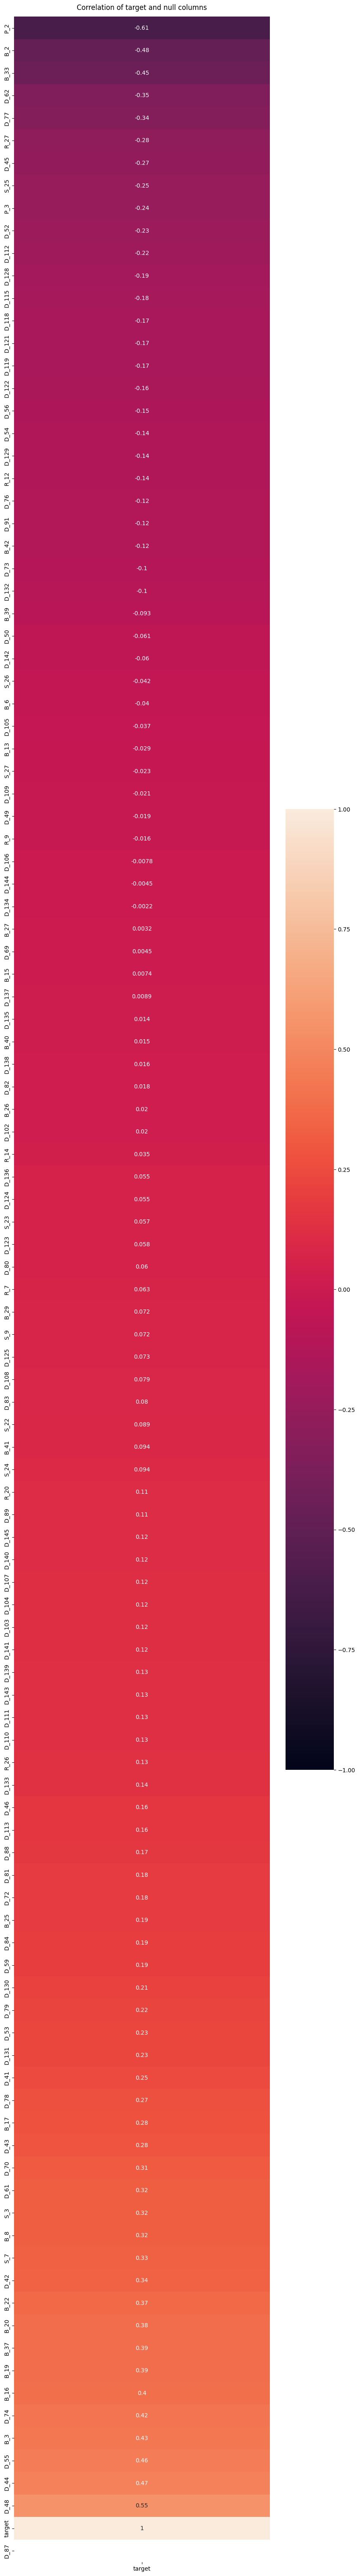

In [24]:
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(figsize=(10,80))
heatmap = sns.heatmap(train_null_corr[['target']].sort_values(by='target'),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation of target and null columns', fontdict={'fontsize':12}, pad=12)

From the chart we can see that, the correlation of the target and columns which contain null values ranges from -0.61 to 0.55. Variable D_87 seems not to be correlated with the target, so we can drop D_87. Though other features have a huge amount of nulls, they matter to the target status to some extent and we need them to predict default status.

## 2.1.3 Null Value Count Distribution with Defaults

We should also check to see how null values are distributed in regards to the target variable defaults.

In [25]:
train_data_df2 = train_data_df.copy()
train_data_df2['null_count_per_row'] = train_data_df2.isnull().sum(axis=1)

In [26]:
null_counts = train_data_df2['null_count_per_row'].value_counts()
len(null_counts)

93

In [27]:
z = dict()
for (null_count, default_status), value_count in train_data_df2.groupby(['null_count_per_row','target'])['target'].count().to_dict().items():
    if null_count not in z:
        z[null_count] = dict()
    z[null_count][default_status] = value_count

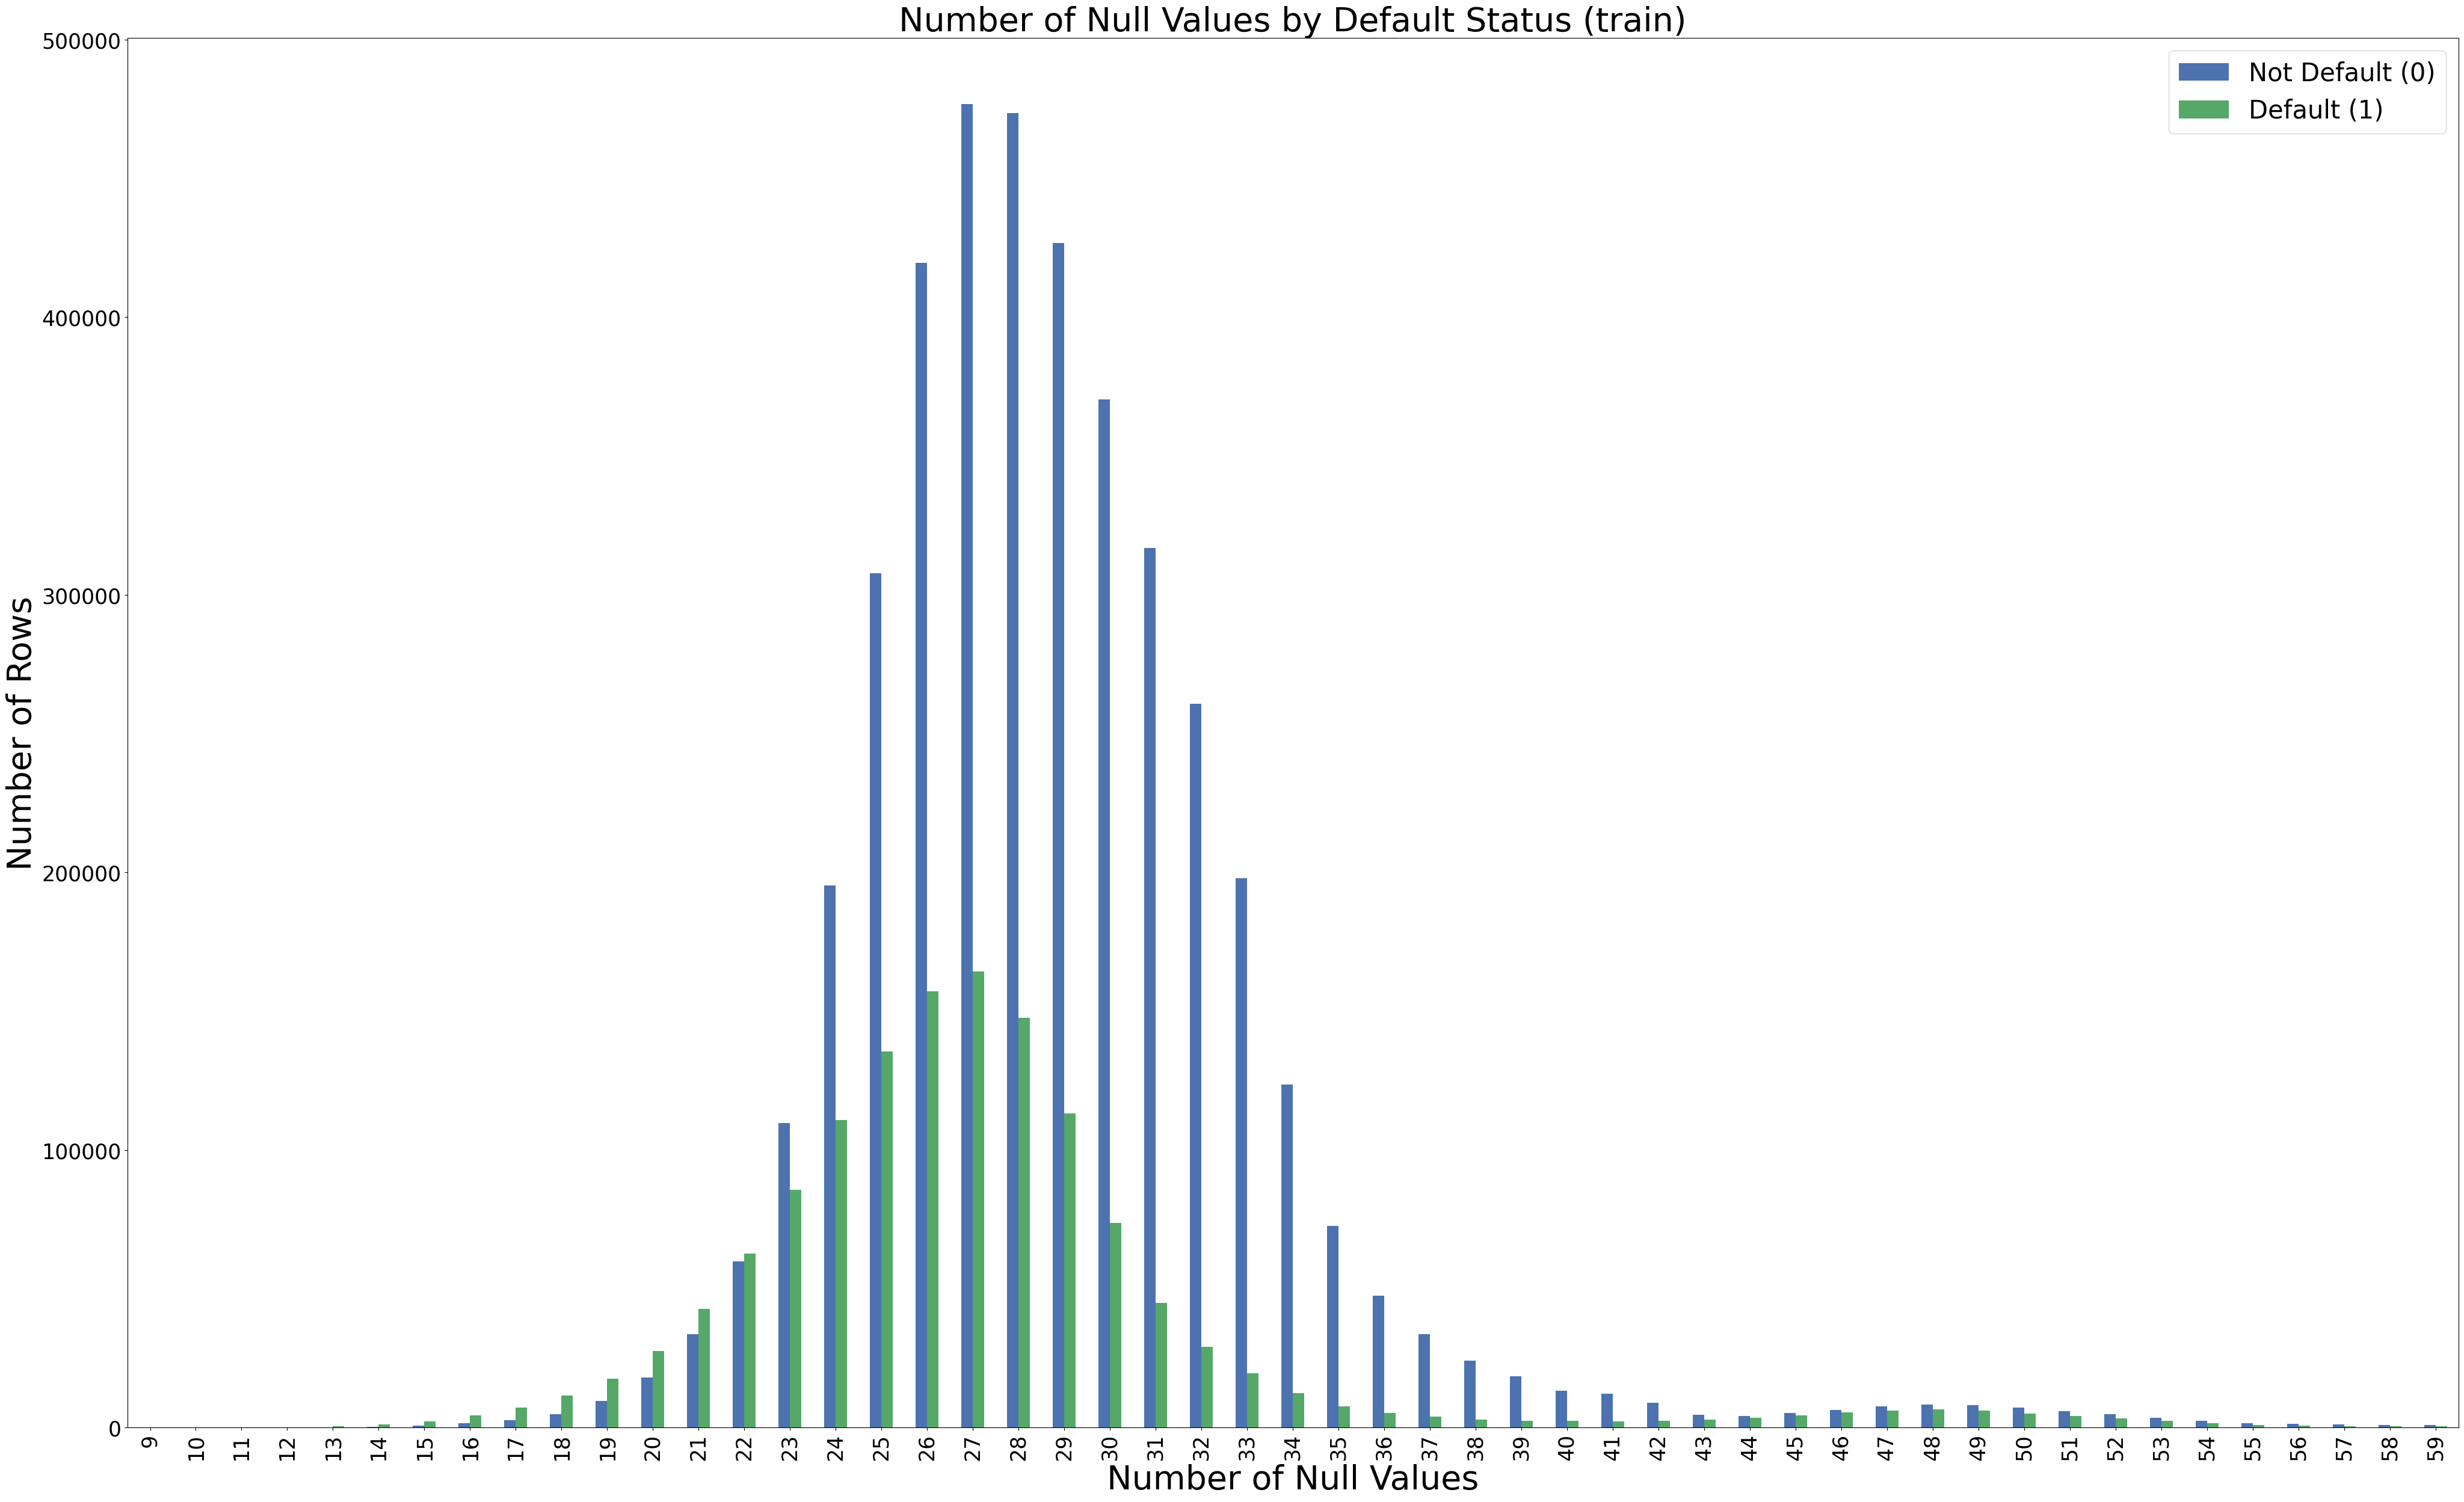

In [28]:
a=[]
for null_count in z:
    if null_count < 60:
        a.append([null_count, z[null_count][0], z[null_count][1]])

df = pd.DataFrame(a, columns=["Number of Null Values", "Not Default (0)", "Default (1)"])
ax = df.plot(x="Number of Null Values", y=["Not Default (0)", "Default (1)"], kind="bar", figsize=(50, 30))
ax.set_title("Number of Null Values by Default Status (train)", fontsize=40)
ax.set_ylabel("Number of Rows",fontsize=40)
ax.set_xlabel("Number of Null Values",fontsize=40)
ax.tick_params(axis='both',labelsize=25)
ax.legend(fontsize=30)

In the train dataset: We can learn from the result that the default curve tends to skew left, compared to the non-default curve, which means rows with less null values are more likely to have defaults. And we also can see that rows with 15-22 null values contain more targets "default." Adding "number of null values per row" as a feature to our dataset will help the model to better predict. It seems null values are informative to the classifier.

In [29]:
test_data_df2 = test_data_df.copy()
test_data_df2['null_count_per_row'] = test_data_df2.isnull().sum(axis=1)
y=pd.DataFrame(test_data_df2.groupby(['null_count_per_row'])['null_count_per_row'].count().to_dict().items())

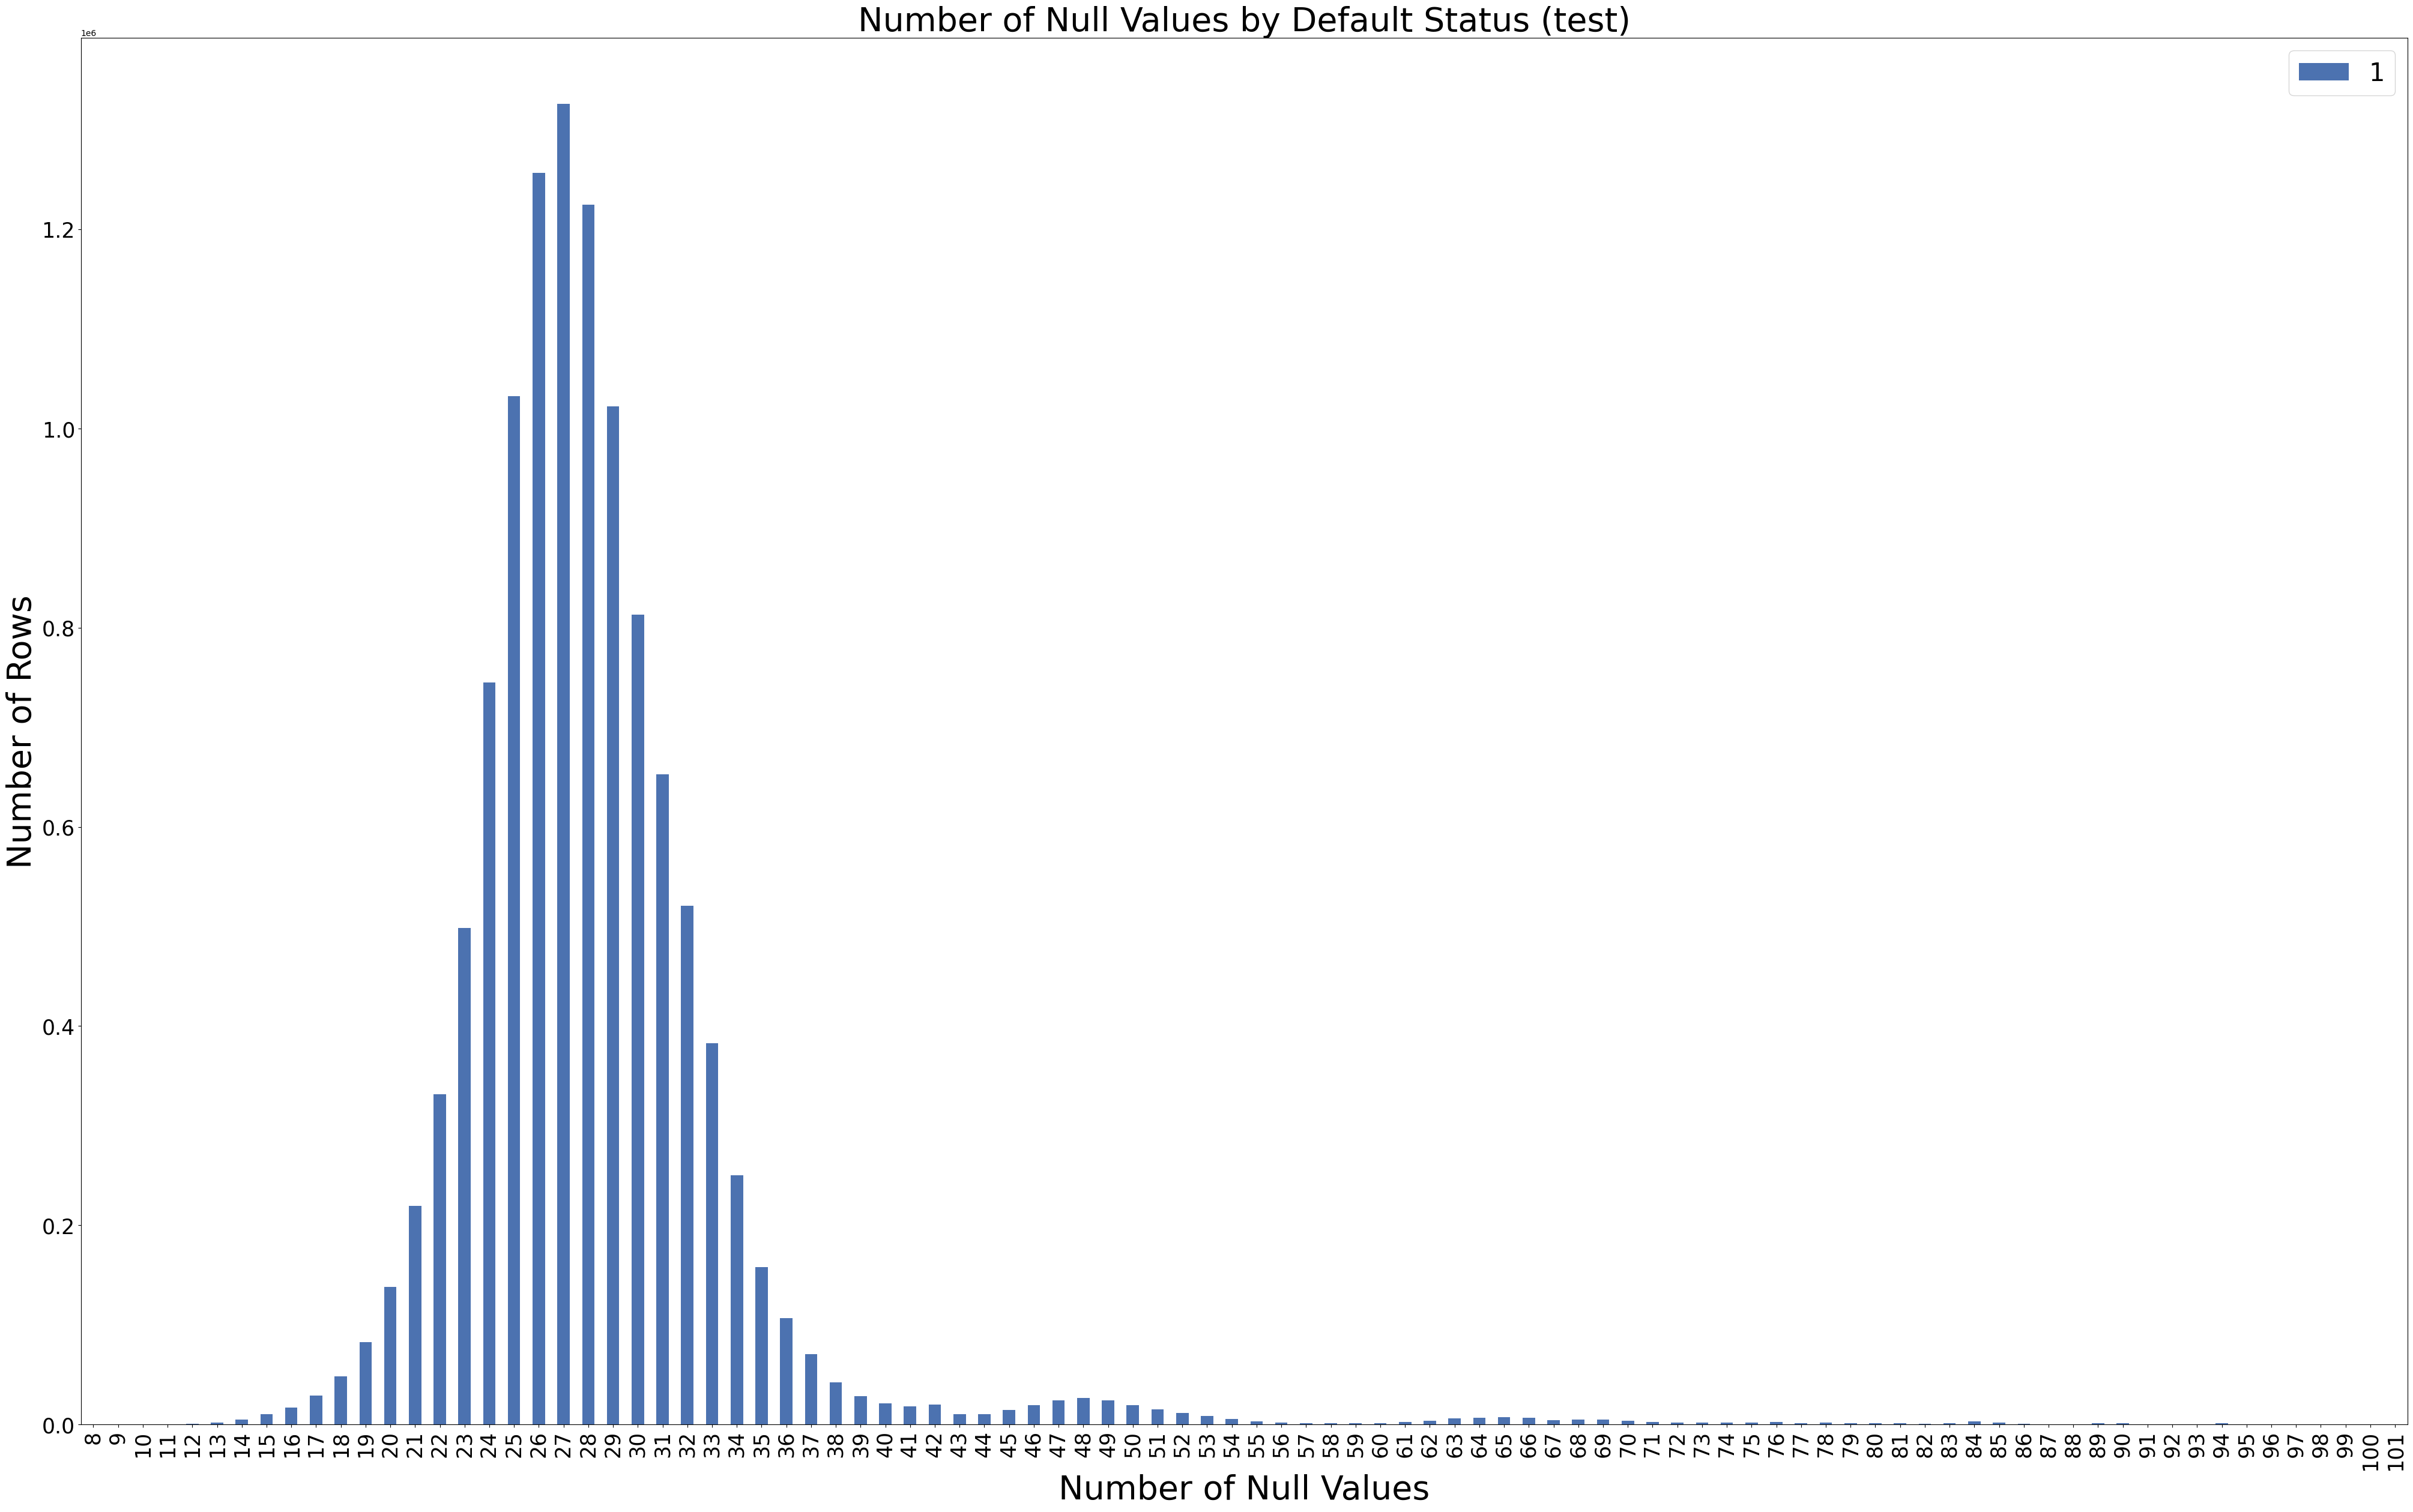

In [30]:
ax = y.plot(x=0, y=1, kind="bar", figsize=(50, 30))
ax.set_title("Number of Null Values by Default Status (test)", fontsize=40)
ax.set_ylabel("Number of Rows",fontsize=40)
ax.set_xlabel("Number of Null Values",fontsize=40)
ax.tick_params(axis='both',labelsize=25)
ax.legend(fontsize=30)

In the test dataset, we could see that like the train dataset most rows have 27 null values; Also, the test dataset have more nulls per row than the train dataset.

## 2.2 Check date range for two datasets

In [31]:
#test_data_df['S_2'].max() the latest date is 2019-10-31
#train_data_df['S_2'].min() the earliest date is 2017-03-01

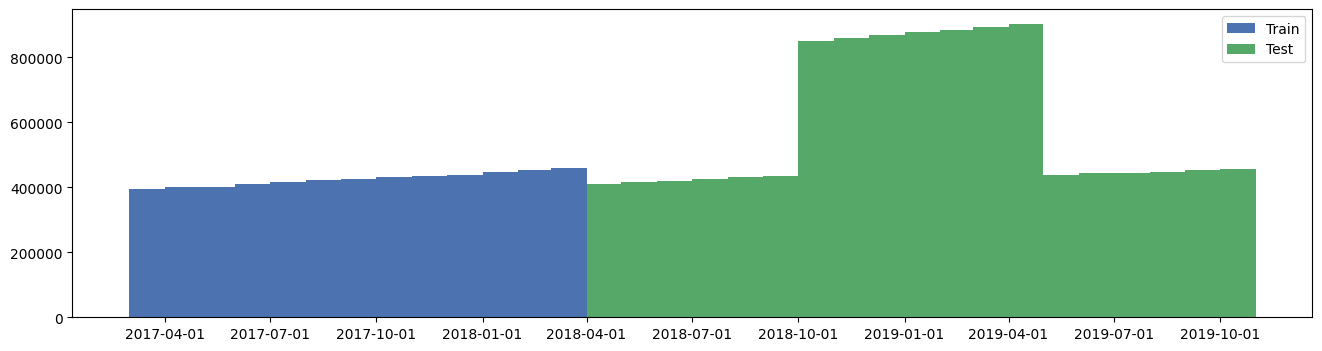

In [32]:
train_date = train_data_df['S_2'].rename('train')
test_date = test_data_df['S_2'].rename('test')
plt.figure(figsize=(16, 4))
plt.hist(train_date, bins=pd.date_range("2017-03-01", "2019-11-01", freq="MS"))
plt.hist(test_date, bins=pd.date_range("2017-03-01", "2019-11-01", freq="MS"))
plt.xticks(pd.date_range("2017-03-01", "2019-11-01", freq="QS"))
plt.legend(['Train','Test'])
plt.show()

As the graph illustrates, the train dataset covers the date from 2017-04 to 2018-04, and the test dataset ranges from 2018-04 to 2019-10. Two datasets don't have period overlapped.

## 2.3 Count of statements per customer

In [33]:
s_per_customer_train = train_data_df.groupby('customer_ID')['target'].count().value_counts().to_dict()
s_per_customer_test = test_data_df.groupby('customer_ID')['S_2'].count().value_counts().to_dict()

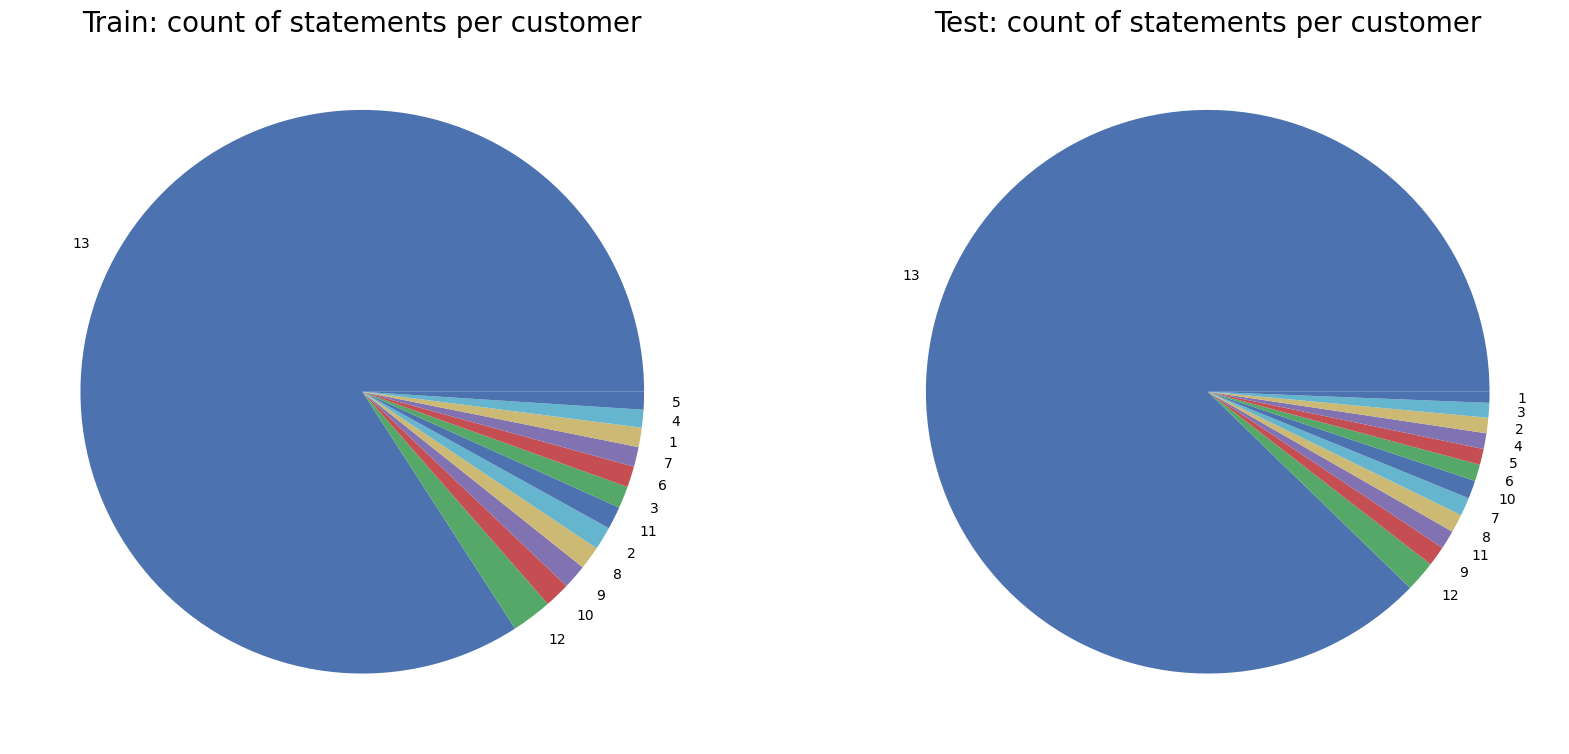

In [34]:
dict = {'fontsize': 20,
 'color': 'black'}

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.pie(s_per_customer_train.values(),labels=s_per_customer_train.keys())
ax2.pie(s_per_customer_test.values(),labels=s_per_customer_test.keys())
ax1.set_title('Train: count of statements per customer',fontdict=dict)
ax2.set_title('Test: count of statements per customer',fontdict=dict)
plt.show()

According to the pie chart above, over 80% of customer have 13 credit card statements in both the train and test datasets. Since we need to predict default probability for each customer, it is necessary to aggregate statements for every customer.

## 2.4.1 Categorical feature distribution by default values

In [35]:
cat_cols = train_meta[train_meta['data_types'] == 'category']['variable_names'].to_list()
cat_cols

['D_63',
 'D_64',
 'D_66',
 'D_68',
 'B_30',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126']

In [36]:
cat_meta = train_meta[train_meta['variable_names'].isin(cat_cols)].sort_values(by=['percentage_of_missing_values(%)'],ascending=False)
cat_meta

variable_names data_role variable_types data_types count_of_unique_values  \
60            D_66   feature                  category                      3   
62            D_68   feature                  category                      8   
155          D_114   feature                  category                      3   
157          D_116   feature                  category                      3   
158          D_117   feature                  category                      8   
161          D_120   feature                  category                      3   
167          D_126   feature                  category                      4   
105           B_30   feature                  category                      4   
145           B_38   feature                  category                      8   
53            D_63   feature                  category                      6   
54            D_64   feature                  category                      5   

    count_of_missing_values percentage_of_missing_values(%)  
60                  4908097                           88.73  
62                   216503                            3.91  
155                  176716                            3.19  
157                  176716                            3.19  
158                  176716                            3.19  
161                  176716                            3.19  
167                  116816                            2.11  
105                    2016                            0.04  
145                    2016                            0.04  
53                        0                             0.0  
54                        0                             0.0

We could see that, except variable D_66 with a high level of null values, other catgorical variables have an acceptable amount of null values. Also, all of their unique values are less than 10, so we don't need data binning.

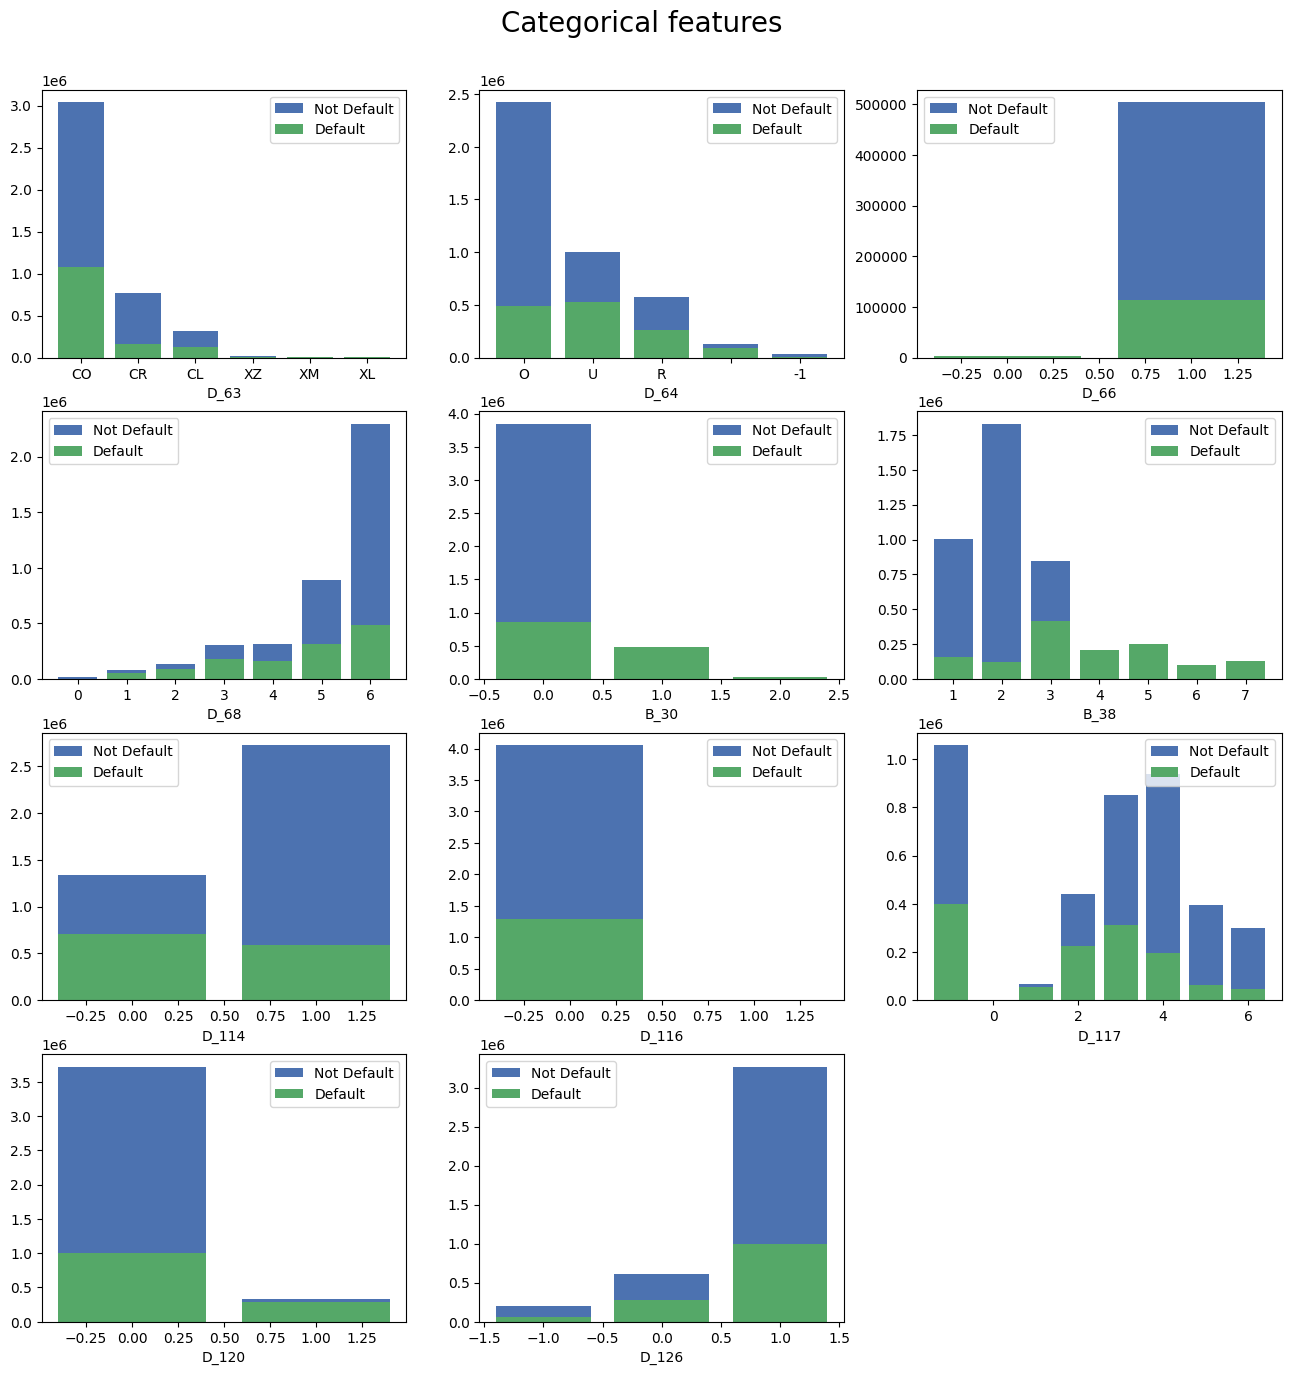

In [37]:
plt.figure(figsize=(16, 16))
for i,k in enumerate(cat_cols):
    
    plt.subplot(4, 3, i+1)
    y1 = pd.DataFrame(train_data_df[train_data_df['target'] == 0][k].value_counts().rename('Not Default'))
    y2 = pd.DataFrame(train_data_df[train_data_df['target'] == 1][k].value_counts().rename('Default'))
    df = pd.merge(y1,y2,left_index=True,right_index=True)
    df.index.name = 'values'
    plt.bar(df.index, df['Not Default'])
    plt.bar(df.index, df['Default'])
    plt.xlabel(k)
    plt.legend(['Not Default','Default'])
plt.suptitle('Categorical features', fontsize=20, y=0.93)
plt.show()

The distributions of defualt and non-default differ for each categorical feature.

## 2.4.2 Numerical feature distribution by default values

Total: 177
0working
1working
2working
3working
4working
5working
6working
7working
8working
9working
10working
11working
2 done.
12working
11 done.
13working
0 done.
14working
7 done.
15working
1 done.
16working
9 done.
10 done.
3 done.
17working
18working
19working
5 done.
20working
4 done.
21working
8 done.
6 done.
22working
23working
12 done.
24working
13 done.
25working
14 done.
26working
15 done.
27working
16 done.
28working
18 done.
29working
20 done.
24 done.
30working
31working
23 done.
32working
21 done.
33working
17 done.
22 done.
34working
35working
19 done.
36working
25 done.
37working
26 done.
38working
27 done.
39working
29 done.
40working
31 done.
41working
28 done.
42working
32 done.
43working
30 done.
44working
33 done.
45working
36 done.
46working
34 done.
35 done.
47working
48working
37 done.
49working
38 done.
50working
39 done.
51working
40 done.
52working
41 done.42 done.

53working
54working
43 done.
55working
44 done.
56working
45 done.
57working
47 done.
58work

C:\Users\mingl\AppData\Local\Temp\ipykernel_77080\1813682729.py:51: UserWarning: Legend does not support 'Not Default' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(['Not Default'],['Default'])


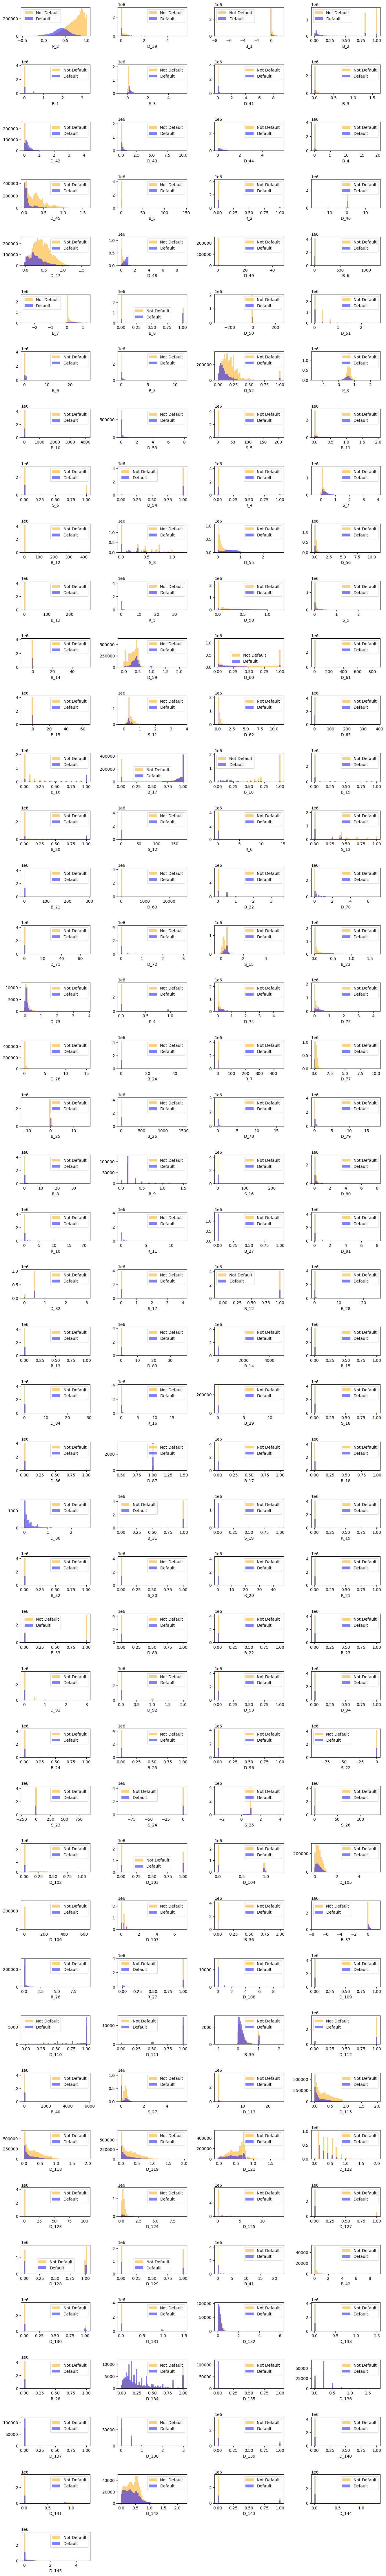

In [38]:
numeric_cols = [col for col in train_data_df.columns if col not in cat_cols + ['customer_ID', 'target', 'S_2']]
plt.figure(figsize = (16,90))

import shutil
from concurrent.futures import ThreadPoolExecutor
import threading


class PlotData:
    i
    k
    df
    
    def __init__(self, i, k, df):
        self.i  = i
        self.k  = k
        self.df = df
        
        
process_data = []

def graph_func(train_data_df, i, k):
    print(str(i) + "working")
    df1 = pd.DataFrame(train_data_df[train_data_df['target'] == 0][k].rename('Not Default'))
    df2 = pd.DataFrame(train_data_df[train_data_df['target'] == 1][k].rename('Default'))
    df = pd.concat([df1,df2])
    
    process_data.append(PlotData(i,k,df))
    print(str(i) + " done.")
    return df



index_cols=0
for i,k in enumerate(numeric_cols):
    index_cols=index_cols+1
    

print("Total: " + str(index_cols))
with ThreadPoolExecutor(max_workers=12) as pool:
    for i, k in enumerate(numeric_cols):
        pool.submit(graph_func, train_data_df, i, k)
        
    pool.shutdown(wait=True)
    

for plt_item in process_data:
    plt.subplot(45, 4, plt_item.i+1)
    plt.hist(plt_item.df['Not Default'], bins=50, color=['orange'],alpha=0.5)
    plt.hist(plt_item.df['Default'], bins=50, color=['blue'],alpha=0.5)
    plt.legend(['Not Default'],['Default'])
    plt.xlabel(plt_item.k)
    plt.legend(['Not Default','Default'])
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.0, wspace=0.4)
plt.show()

# 3.Process and prepare data

1. Check and drop dupilcates

In [39]:
train_data_df.drop_duplicates(inplace=True)

In [40]:
train_data_df.shape

(5531451, 191)

2. Count the null values per row as a new feature.

In [41]:
train_data_df['null_values_per_row'] = train_data_df.isnull().sum(axis=1)
test_data_df['null_values_per_row'] = test_data_df.isnull().sum(axis=1)

3. drop the column D_87

In [42]:
train_data_df.drop(['D_87'],axis=1,inplace=True)

4. Encode categorical features

From the categorical feature distributions we can learn that, categorical features have less than 10 unique values. Since the train dataset already has more than 100 columns, here we adopt labelencoder rather than onehotencoding.

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df = train_data_df.copy()
for i in cat_cols:
    train_df[i] = le.fit_transform(train_df[i])
    print("finished"+str(i))

finishedD_63
finishedD_64
finishedD_66
finishedD_68
finishedB_30
finishedB_38
finishedD_114
finishedD_116
finishedD_117
finishedD_120
finishedD_126


In [43]:
le = LabelEncoder()
test_data_df = test_data_df.copy()
for i in cat_cols:
    test_data_df[i] = le.fit_transform(test_data_df[i])
    print("finished"+str(i))

finishedD_63
finishedD_64
finishedD_66
finishedD_68
finishedB_30
finishedB_38
finishedD_114
finishedD_116
finishedD_117
finishedD_120
finishedD_126


5. Aggregate data by each customer: Use mean, std, min, max, and last to aggregate numeric values, and count, last, nunique to aggregate categorical data. We will engineer features suggested by here https://www.kaggle.com/code/huseyincot/amex-agg-data-how-it-created

In [44]:
# aggregate the train dataset!
# numeric_cols.remove('D_87')
numeric_cols.append('null_values_per_row')
train_num_agg = train_df.groupby(["customer_ID"])[numeric_cols].agg(['mean', 'std', 'min', 'max', 'last'])
train_num_agg.columns = ['_'.join(x) for x in train_num_agg.columns]
train_num_agg.reset_index(inplace = True)
train_cat_agg = train_df.groupby("customer_ID")[cat_cols].agg(['count', 'last', 'nunique'])
train_cat_agg.columns = ['_'.join(x) for x in train_cat_agg.columns]
train_cat_agg.reset_index(inplace = True)
train_df = pd.merge(train_num_agg, train_cat_agg, on=['customer_ID']).merge(train_label_df, on=['customer_ID'])

In [46]:
# aggregate the test dataset!
test_num_agg = test_data_df.groupby(["customer_ID"])[numeric_cols].agg(['mean', 'std', 'min', 'max', 'last'])
test_num_agg.columns = ['_'.join(x) for x in test_num_agg.columns]
test_num_agg.reset_index(inplace = True)
test_cat_agg = test_data_df.groupby("customer_ID")[cat_cols].agg(['count', 'last', 'nunique'])
test_cat_agg.columns = ['_'.join(x) for x in test_cat_agg.columns]
test_cat_agg.reset_index(inplace = True)
test_df = pd.merge(test_num_agg, test_cat_agg, on=['customer_ID'])

# 4. ML Training: LightGBM

In [64]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

Split the target and features: 

In [47]:
y = train_df['target']
X = train_df.copy().drop(['target','customer_ID'],axis=1)

Split the train and validation datasets:

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50,train_size=0.7,stratify=y)

In [75]:
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',2000,3000,3500)
    num_leaves = trial.suggest_int('num_leaves',7,8,9)
    learning_rate = trial.suggest_uniform('learning_rate',0.01,0.05)
    min_data_in_leaf =  trial.suggest_int('min_data_in_leaf', 5, 100)
    bagging_fraction = trial.suggest_uniform('bagging_fraction', 0.3, 1.0)
    feature_fraction = trial.suggest_uniform('feature_fraction', 0.3, 1.0)
    max_depth = trial.suggest_int('max_depth', 4, 5)
    reg_alpha = trial.suggest_uniform('reg_alpha', 0, 10)
    
    params = {'boosting_type': 'gbdt',
              'n_estimators': n_estimators,
              'num_leaves': num_leaves,
              'learning_rate': learning_rate,
              'min_data_in_leaf': min_data_in_leaf,
              'reg_alpha':reg_alpha,
              'bagging_fraction': bagging_fraction,
              'feature_fraction': feature_fraction,
              'objective': 'binary',
              'metric':'binary_logloss',
              'device':'cpu',
              'random_state': 42}
    
    clf.fit(X_train, y_train, eval_metric='logloss', 
          eval_set=[(X_test, y_test)], early_stopping_rounds=200)
    
    y_pred = pd.DataFrame(data=clf.predict_proba(X_test)[:, 1], columns=['prediction']).reset_index(drop=True)
    y_true = pd.DataFrame(data=y_test.reset_index(drop=True), columns=['target'])
    
    return amex_metric(y_true,y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

[I 2022-08-24 16:43:38,890] A new study created in memory with name: no-name-286f1748-17ba-4b1c-8bb2-96ecca60eca8
E:\Program Files\Python38\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2000, 3000] and step=3500, but the range is not divisible by `step`. It will be replaced by [2000, 2000].
  warnings.warn(
E:\Program Files\Python38\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [7, 8] and step=9, but the range is not divisible by `step`. It will be replaced by [7, 7].
  warnings.warn(
E:\Program Files\Python38\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=0.8 will be ignored. Current value: bagging_fraction=0.3
[1]	valid_0's binary_logloss: 0.547905
[2]	valid_0's binary_logloss: 0.526034
[3]	valid_0's binary_logloss: 0.507027
[4]	valid_0's binary_logloss: 0.489293
[5]	valid_0's binary_logloss: 0.473946
[6]	valid_0's binary_logloss: 0.459779
[7]	valid_0's binary_logloss: 0.44709
[8]	valid_0's binary_logloss: 0.43519
[9]	valid_0's binary_logloss: 0.424383
[10]	valid_0's binary_logloss: 0.41428
[11]	valid_0's binary_logloss: 0.404519
[12]	valid_0's binary_logloss: 0.39577
[13]	valid_0's binary_logloss: 0.38737
[14]	valid_0's binary_logloss: 0.379608
[15]	valid_0's binary_logloss: 0.372388
[16]	valid_0's binary_logloss: 0.365834
[17]	valid_0's binary_logloss: 0.359609
[18]	valid_0's binary_logloss: 0.353544
[19]	valid_0's binary_logloss: 0.348253
[20]	valid_0'

[201]	valid_0's binary_logloss: 0.227913
[202]	valid_0's binary_logloss: 0.227849
[203]	valid_0's binary_logloss: 0.227788
[204]	valid_0's binary_logloss: 0.227732
[205]	valid_0's binary_logloss: 0.227691
[206]	valid_0's binary_logloss: 0.227625
[207]	valid_0's binary_logloss: 0.227572
[208]	valid_0's binary_logloss: 0.227507
[209]	valid_0's binary_logloss: 0.227443
[210]	valid_0's binary_logloss: 0.227395
[211]	valid_0's binary_logloss: 0.22733
[212]	valid_0's binary_logloss: 0.227291
[213]	valid_0's binary_logloss: 0.22725
[214]	valid_0's binary_logloss: 0.227201
[215]	valid_0's binary_logloss: 0.227153
[216]	valid_0's binary_logloss: 0.227102
[217]	valid_0's binary_logloss: 0.227047
[218]	valid_0's binary_logloss: 0.22699
[219]	valid_0's binary_logloss: 0.226942
[220]	valid_0's binary_logloss: 0.226901
[221]	valid_0's binary_logloss: 0.226869
[222]	valid_0's binary_logloss: 0.226801
[223]	valid_0's binary_logloss: 0.226756
[224]	valid_0's binary_logloss: 0.226715
[225]	valid_0's bin

[407]	valid_0's binary_logloss: 0.22237
[408]	valid_0's binary_logloss: 0.222356
[409]	valid_0's binary_logloss: 0.22236
[410]	valid_0's binary_logloss: 0.222349
[411]	valid_0's binary_logloss: 0.222336
[412]	valid_0's binary_logloss: 0.22232
[413]	valid_0's binary_logloss: 0.222303
[414]	valid_0's binary_logloss: 0.222299
[415]	valid_0's binary_logloss: 0.2223
[416]	valid_0's binary_logloss: 0.222283
[417]	valid_0's binary_logloss: 0.222256
[418]	valid_0's binary_logloss: 0.222244
[419]	valid_0's binary_logloss: 0.222252
[420]	valid_0's binary_logloss: 0.222232
[421]	valid_0's binary_logloss: 0.222249
[422]	valid_0's binary_logloss: 0.222231
[423]	valid_0's binary_logloss: 0.222217
[424]	valid_0's binary_logloss: 0.222204
[425]	valid_0's binary_logloss: 0.222184
[426]	valid_0's binary_logloss: 0.222177
[427]	valid_0's binary_logloss: 0.222164
[428]	valid_0's binary_logloss: 0.222148
[429]	valid_0's binary_logloss: 0.222143
[430]	valid_0's binary_logloss: 0.222129
[431]	valid_0's binar

[614]	valid_0's binary_logloss: 0.220777
[615]	valid_0's binary_logloss: 0.220777
[616]	valid_0's binary_logloss: 0.22077
[617]	valid_0's binary_logloss: 0.220767
[618]	valid_0's binary_logloss: 0.220777
[619]	valid_0's binary_logloss: 0.220761
[620]	valid_0's binary_logloss: 0.220767
[621]	valid_0's binary_logloss: 0.22077
[622]	valid_0's binary_logloss: 0.220771
[623]	valid_0's binary_logloss: 0.220774
[624]	valid_0's binary_logloss: 0.220774
[625]	valid_0's binary_logloss: 0.22077
[626]	valid_0's binary_logloss: 0.220753
[627]	valid_0's binary_logloss: 0.22075
[628]	valid_0's binary_logloss: 0.220752
[629]	valid_0's binary_logloss: 0.220754
[630]	valid_0's binary_logloss: 0.220752
[631]	valid_0's binary_logloss: 0.220737
[632]	valid_0's binary_logloss: 0.220729
[633]	valid_0's binary_logloss: 0.220718
[634]	valid_0's binary_logloss: 0.220716
[635]	valid_0's binary_logloss: 0.220713
[636]	valid_0's binary_logloss: 0.220726
[637]	valid_0's binary_logloss: 0.220722
[638]	valid_0's bina

[816]	valid_0's binary_logloss: 0.220264
[817]	valid_0's binary_logloss: 0.220251
[818]	valid_0's binary_logloss: 0.220244
[819]	valid_0's binary_logloss: 0.220243
[820]	valid_0's binary_logloss: 0.220235
[821]	valid_0's binary_logloss: 0.22023
[822]	valid_0's binary_logloss: 0.220227
[823]	valid_0's binary_logloss: 0.220221
[824]	valid_0's binary_logloss: 0.220223
[825]	valid_0's binary_logloss: 0.22022
[826]	valid_0's binary_logloss: 0.220215
[827]	valid_0's binary_logloss: 0.220214
[828]	valid_0's binary_logloss: 0.220228
[829]	valid_0's binary_logloss: 0.220222
[830]	valid_0's binary_logloss: 0.220212
[831]	valid_0's binary_logloss: 0.220199
[832]	valid_0's binary_logloss: 0.220191
[833]	valid_0's binary_logloss: 0.22019
[834]	valid_0's binary_logloss: 0.220185
[835]	valid_0's binary_logloss: 0.220183
[836]	valid_0's binary_logloss: 0.220177
[837]	valid_0's binary_logloss: 0.22018
[838]	valid_0's binary_logloss: 0.22018
[839]	valid_0's binary_logloss: 0.220175
[840]	valid_0's binar

[1017]	valid_0's binary_logloss: 0.219878
[1018]	valid_0's binary_logloss: 0.219871
[1019]	valid_0's binary_logloss: 0.21987
[1020]	valid_0's binary_logloss: 0.219867
[1021]	valid_0's binary_logloss: 0.219858
[1022]	valid_0's binary_logloss: 0.219856
[1023]	valid_0's binary_logloss: 0.219856
[1024]	valid_0's binary_logloss: 0.219856
[1025]	valid_0's binary_logloss: 0.219858
[1026]	valid_0's binary_logloss: 0.219851
[1027]	valid_0's binary_logloss: 0.219847
[1028]	valid_0's binary_logloss: 0.219845
[1029]	valid_0's binary_logloss: 0.219845
[1030]	valid_0's binary_logloss: 0.219845
[1031]	valid_0's binary_logloss: 0.219835
[1032]	valid_0's binary_logloss: 0.21984
[1033]	valid_0's binary_logloss: 0.219836
[1034]	valid_0's binary_logloss: 0.219839
[1035]	valid_0's binary_logloss: 0.219841
[1036]	valid_0's binary_logloss: 0.219834
[1037]	valid_0's binary_logloss: 0.219833
[1038]	valid_0's binary_logloss: 0.219826
[1039]	valid_0's binary_logloss: 0.219823
[1040]	valid_0's binary_logloss: 0.2

[1218]	valid_0's binary_logloss: 0.219558
[1219]	valid_0's binary_logloss: 0.219553
[1220]	valid_0's binary_logloss: 0.219543
[1221]	valid_0's binary_logloss: 0.219539
[1222]	valid_0's binary_logloss: 0.219541
[1223]	valid_0's binary_logloss: 0.219539
[1224]	valid_0's binary_logloss: 0.219544
[1225]	valid_0's binary_logloss: 0.219546
[1226]	valid_0's binary_logloss: 0.219543
[1227]	valid_0's binary_logloss: 0.219551
[1228]	valid_0's binary_logloss: 0.219546
[1229]	valid_0's binary_logloss: 0.219545
[1230]	valid_0's binary_logloss: 0.219537
[1231]	valid_0's binary_logloss: 0.219539
[1232]	valid_0's binary_logloss: 0.219529
[1233]	valid_0's binary_logloss: 0.219513
[1234]	valid_0's binary_logloss: 0.219514
[1235]	valid_0's binary_logloss: 0.219509
[1236]	valid_0's binary_logloss: 0.219514
[1237]	valid_0's binary_logloss: 0.21951
[1238]	valid_0's binary_logloss: 0.219505
[1239]	valid_0's binary_logloss: 0.219503
[1240]	valid_0's binary_logloss: 0.219501
[1241]	valid_0's binary_logloss: 0.

[1418]	valid_0's binary_logloss: 0.219359
[1419]	valid_0's binary_logloss: 0.219358
[1420]	valid_0's binary_logloss: 0.219362
[1421]	valid_0's binary_logloss: 0.21937
[1422]	valid_0's binary_logloss: 0.21937
[1423]	valid_0's binary_logloss: 0.219371
[1424]	valid_0's binary_logloss: 0.21937
[1425]	valid_0's binary_logloss: 0.219363
[1426]	valid_0's binary_logloss: 0.219361
[1427]	valid_0's binary_logloss: 0.219359
[1428]	valid_0's binary_logloss: 0.219363
[1429]	valid_0's binary_logloss: 0.219357
[1430]	valid_0's binary_logloss: 0.219355
[1431]	valid_0's binary_logloss: 0.219356
[1432]	valid_0's binary_logloss: 0.219358
[1433]	valid_0's binary_logloss: 0.219356
[1434]	valid_0's binary_logloss: 0.219355
[1435]	valid_0's binary_logloss: 0.219355
[1436]	valid_0's binary_logloss: 0.219349
[1437]	valid_0's binary_logloss: 0.21935
[1438]	valid_0's binary_logloss: 0.219352
[1439]	valid_0's binary_logloss: 0.21935
[1440]	valid_0's binary_logloss: 0.219347
[1441]	valid_0's binary_logloss: 0.2193

[1616]	valid_0's binary_logloss: 0.219235
[1617]	valid_0's binary_logloss: 0.219232
[1618]	valid_0's binary_logloss: 0.219227
[1619]	valid_0's binary_logloss: 0.219225
[1620]	valid_0's binary_logloss: 0.219228
[1621]	valid_0's binary_logloss: 0.219229
[1622]	valid_0's binary_logloss: 0.219229
[1623]	valid_0's binary_logloss: 0.219227
[1624]	valid_0's binary_logloss: 0.219228
[1625]	valid_0's binary_logloss: 0.219234
[1626]	valid_0's binary_logloss: 0.219238
[1627]	valid_0's binary_logloss: 0.219239
[1628]	valid_0's binary_logloss: 0.219242
[1629]	valid_0's binary_logloss: 0.219244
[1630]	valid_0's binary_logloss: 0.219252
[1631]	valid_0's binary_logloss: 0.219254
[1632]	valid_0's binary_logloss: 0.219245
[1633]	valid_0's binary_logloss: 0.219244
[1634]	valid_0's binary_logloss: 0.219241
[1635]	valid_0's binary_logloss: 0.21924
[1636]	valid_0's binary_logloss: 0.219236
[1637]	valid_0's binary_logloss: 0.219235
[1638]	valid_0's binary_logloss: 0.219235
[1639]	valid_0's binary_logloss: 0.

[1812]	valid_0's binary_logloss: 0.219221
[1813]	valid_0's binary_logloss: 0.219223
[1814]	valid_0's binary_logloss: 0.219223
[1815]	valid_0's binary_logloss: 0.219222
[1816]	valid_0's binary_logloss: 0.219223
[1817]	valid_0's binary_logloss: 0.219225
[1818]	valid_0's binary_logloss: 0.219225
[1819]	valid_0's binary_logloss: 0.219228
[1820]	valid_0's binary_logloss: 0.21923
[1821]	valid_0's binary_logloss: 0.219229
[1822]	valid_0's binary_logloss: 0.219225
[1823]	valid_0's binary_logloss: 0.219227
[1824]	valid_0's binary_logloss: 0.219229
[1825]	valid_0's binary_logloss: 0.219229
[1826]	valid_0's binary_logloss: 0.219227
[1827]	valid_0's binary_logloss: 0.219228
[1828]	valid_0's binary_logloss: 0.219228
[1829]	valid_0's binary_logloss: 0.219227
[1830]	valid_0's binary_logloss: 0.219222
[1831]	valid_0's binary_logloss: 0.21922
[1832]	valid_0's binary_logloss: 0.219219
[1833]	valid_0's binary_logloss: 0.219211
[1834]	valid_0's binary_logloss: 0.219207
[1835]	valid_0's binary_logloss: 0.2

[2008]	valid_0's binary_logloss: 0.219178
[2009]	valid_0's binary_logloss: 0.219175
[2010]	valid_0's binary_logloss: 0.219178
[2011]	valid_0's binary_logloss: 0.219179
[2012]	valid_0's binary_logloss: 0.219179
[2013]	valid_0's binary_logloss: 0.21918
[2014]	valid_0's binary_logloss: 0.219177
[2015]	valid_0's binary_logloss: 0.219179
[2016]	valid_0's binary_logloss: 0.21918
[2017]	valid_0's binary_logloss: 0.219184
[2018]	valid_0's binary_logloss: 0.219183
[2019]	valid_0's binary_logloss: 0.219178
[2020]	valid_0's binary_logloss: 0.219176
[2021]	valid_0's binary_logloss: 0.219176
[2022]	valid_0's binary_logloss: 0.219175
[2023]	valid_0's binary_logloss: 0.21917
[2024]	valid_0's binary_logloss: 0.219172
[2025]	valid_0's binary_logloss: 0.219173
[2026]	valid_0's binary_logloss: 0.219172
[2027]	valid_0's binary_logloss: 0.219169
[2028]	valid_0's binary_logloss: 0.219169
[2029]	valid_0's binary_logloss: 0.219165
[2030]	valid_0's binary_logloss: 0.219161
[2031]	valid_0's binary_logloss: 0.21

[I 2022-08-24 16:45:13,735] Trial 0 finished with value: 0.7897934340640067 and parameters: {'n_estimators': 2000, 'num_leaves': 7, 'learning_rate': 0.01532683292364967, 'min_data_in_leaf': 69, 'bagging_fraction': 0.4201778826540623, 'feature_fraction': 0.5455783875342104, 'max_depth': 4, 'reg_alpha': 2.890229273181509}. Best is trial 0 with value: 0.7897934340640067.
E:\Program Files\Python38\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2000, 3000] and step=3500, but the range is not divisible by `step`. It will be replaced by [2000, 2000].
  warnings.warn(
E:\Program Files\Python38\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [7, 8] and step=9, but the range is not divisible by `step`. It will be replaced by [7, 7].
  warnings.warn(
E:\Program Files\Python38\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a futu

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=0.8 will be ignored. Current value: bagging_fraction=0.3
[1]	valid_0's binary_logloss: 0.547905
[2]	valid_0's binary_logloss: 0.526034
[3]	valid_0's binary_logloss: 0.507027
[4]	valid_0's binary_logloss: 0.489293
[5]	valid_0's binary_logloss: 0.473946
[6]	valid_0's binary_logloss: 0.459779
[7]	valid_0's binary_logloss: 0.44709
[8]	valid_0's binary_logloss: 0.43519
[9]	valid_0's binary_logloss: 0.424383
[10]	valid_0's binary_logloss: 0.41428
[11]	valid_0's binary_logloss: 0.404519
[12]	valid_0's binary_logloss: 0.39577
[13]	valid_0's binary_logloss: 0.38737
[14]	valid_0's binary_logloss: 0.379608
[15]	valid_0's binary_logloss: 0.372388
[16]	valid_0's binary_logloss: 0.365834
[17]	valid_0's binary_logloss: 0.359609
[18]	valid_0's binary_logloss: 0.353544
[19]	valid_0's binary_logloss: 0.348253
[20]	valid_0'

[203]	valid_0's binary_logloss: 0.227788
[204]	valid_0's binary_logloss: 0.227732
[205]	valid_0's binary_logloss: 0.227691
[206]	valid_0's binary_logloss: 0.227625
[207]	valid_0's binary_logloss: 0.227572
[208]	valid_0's binary_logloss: 0.227507
[209]	valid_0's binary_logloss: 0.227443
[210]	valid_0's binary_logloss: 0.227395
[211]	valid_0's binary_logloss: 0.22733
[212]	valid_0's binary_logloss: 0.227291
[213]	valid_0's binary_logloss: 0.22725
[214]	valid_0's binary_logloss: 0.227201
[215]	valid_0's binary_logloss: 0.227153
[216]	valid_0's binary_logloss: 0.227102
[217]	valid_0's binary_logloss: 0.227047
[218]	valid_0's binary_logloss: 0.22699
[219]	valid_0's binary_logloss: 0.226942
[220]	valid_0's binary_logloss: 0.226901
[221]	valid_0's binary_logloss: 0.226869
[222]	valid_0's binary_logloss: 0.226801
[223]	valid_0's binary_logloss: 0.226756
[224]	valid_0's binary_logloss: 0.226715
[225]	valid_0's binary_logloss: 0.226676
[226]	valid_0's binary_logloss: 0.22662
[227]	valid_0's bina

[405]	valid_0's binary_logloss: 0.222394
[406]	valid_0's binary_logloss: 0.222387
[407]	valid_0's binary_logloss: 0.22237
[408]	valid_0's binary_logloss: 0.222356
[409]	valid_0's binary_logloss: 0.22236
[410]	valid_0's binary_logloss: 0.222349
[411]	valid_0's binary_logloss: 0.222336
[412]	valid_0's binary_logloss: 0.22232
[413]	valid_0's binary_logloss: 0.222303
[414]	valid_0's binary_logloss: 0.222299
[415]	valid_0's binary_logloss: 0.2223
[416]	valid_0's binary_logloss: 0.222283
[417]	valid_0's binary_logloss: 0.222256
[418]	valid_0's binary_logloss: 0.222244
[419]	valid_0's binary_logloss: 0.222252
[420]	valid_0's binary_logloss: 0.222232
[421]	valid_0's binary_logloss: 0.222249
[422]	valid_0's binary_logloss: 0.222231
[423]	valid_0's binary_logloss: 0.222217
[424]	valid_0's binary_logloss: 0.222204
[425]	valid_0's binary_logloss: 0.222184
[426]	valid_0's binary_logloss: 0.222177
[427]	valid_0's binary_logloss: 0.222164
[428]	valid_0's binary_logloss: 0.222148
[429]	valid_0's binar

[611]	valid_0's binary_logloss: 0.220789
[612]	valid_0's binary_logloss: 0.220786
[613]	valid_0's binary_logloss: 0.220783
[614]	valid_0's binary_logloss: 0.220777
[615]	valid_0's binary_logloss: 0.220777
[616]	valid_0's binary_logloss: 0.22077
[617]	valid_0's binary_logloss: 0.220767
[618]	valid_0's binary_logloss: 0.220777
[619]	valid_0's binary_logloss: 0.220761
[620]	valid_0's binary_logloss: 0.220767
[621]	valid_0's binary_logloss: 0.22077
[622]	valid_0's binary_logloss: 0.220771
[623]	valid_0's binary_logloss: 0.220774
[624]	valid_0's binary_logloss: 0.220774
[625]	valid_0's binary_logloss: 0.22077
[626]	valid_0's binary_logloss: 0.220753
[627]	valid_0's binary_logloss: 0.22075
[628]	valid_0's binary_logloss: 0.220752
[629]	valid_0's binary_logloss: 0.220754
[630]	valid_0's binary_logloss: 0.220752
[631]	valid_0's binary_logloss: 0.220737
[632]	valid_0's binary_logloss: 0.220729
[633]	valid_0's binary_logloss: 0.220718
[634]	valid_0's binary_logloss: 0.220716
[635]	valid_0's bina

[812]	valid_0's binary_logloss: 0.220277
[813]	valid_0's binary_logloss: 0.220276
[814]	valid_0's binary_logloss: 0.220278
[815]	valid_0's binary_logloss: 0.22027
[816]	valid_0's binary_logloss: 0.220264
[817]	valid_0's binary_logloss: 0.220251
[818]	valid_0's binary_logloss: 0.220244
[819]	valid_0's binary_logloss: 0.220243
[820]	valid_0's binary_logloss: 0.220235
[821]	valid_0's binary_logloss: 0.22023
[822]	valid_0's binary_logloss: 0.220227
[823]	valid_0's binary_logloss: 0.220221
[824]	valid_0's binary_logloss: 0.220223
[825]	valid_0's binary_logloss: 0.22022
[826]	valid_0's binary_logloss: 0.220215
[827]	valid_0's binary_logloss: 0.220214
[828]	valid_0's binary_logloss: 0.220228
[829]	valid_0's binary_logloss: 0.220222
[830]	valid_0's binary_logloss: 0.220212
[831]	valid_0's binary_logloss: 0.220199
[832]	valid_0's binary_logloss: 0.220191
[833]	valid_0's binary_logloss: 0.22019
[834]	valid_0's binary_logloss: 0.220185
[835]	valid_0's binary_logloss: 0.220183
[836]	valid_0's bina

[1015]	valid_0's binary_logloss: 0.219872
[1016]	valid_0's binary_logloss: 0.219874
[1017]	valid_0's binary_logloss: 0.219878
[1018]	valid_0's binary_logloss: 0.219871
[1019]	valid_0's binary_logloss: 0.21987
[1020]	valid_0's binary_logloss: 0.219867
[1021]	valid_0's binary_logloss: 0.219858
[1022]	valid_0's binary_logloss: 0.219856
[1023]	valid_0's binary_logloss: 0.219856
[1024]	valid_0's binary_logloss: 0.219856
[1025]	valid_0's binary_logloss: 0.219858
[1026]	valid_0's binary_logloss: 0.219851
[1027]	valid_0's binary_logloss: 0.219847
[1028]	valid_0's binary_logloss: 0.219845
[1029]	valid_0's binary_logloss: 0.219845
[1030]	valid_0's binary_logloss: 0.219845
[1031]	valid_0's binary_logloss: 0.219835
[1032]	valid_0's binary_logloss: 0.21984
[1033]	valid_0's binary_logloss: 0.219836
[1034]	valid_0's binary_logloss: 0.219839
[1035]	valid_0's binary_logloss: 0.219841
[1036]	valid_0's binary_logloss: 0.219834
[1037]	valid_0's binary_logloss: 0.219833
[1038]	valid_0's binary_logloss: 0.2

[1213]	valid_0's binary_logloss: 0.219562
[1214]	valid_0's binary_logloss: 0.21956
[1215]	valid_0's binary_logloss: 0.219557
[1216]	valid_0's binary_logloss: 0.219557
[1217]	valid_0's binary_logloss: 0.219557
[1218]	valid_0's binary_logloss: 0.219558
[1219]	valid_0's binary_logloss: 0.219553
[1220]	valid_0's binary_logloss: 0.219543
[1221]	valid_0's binary_logloss: 0.219539
[1222]	valid_0's binary_logloss: 0.219541
[1223]	valid_0's binary_logloss: 0.219539
[1224]	valid_0's binary_logloss: 0.219544
[1225]	valid_0's binary_logloss: 0.219546
[1226]	valid_0's binary_logloss: 0.219543
[1227]	valid_0's binary_logloss: 0.219551
[1228]	valid_0's binary_logloss: 0.219546
[1229]	valid_0's binary_logloss: 0.219545
[1230]	valid_0's binary_logloss: 0.219537
[1231]	valid_0's binary_logloss: 0.219539
[1232]	valid_0's binary_logloss: 0.219529
[1233]	valid_0's binary_logloss: 0.219513
[1234]	valid_0's binary_logloss: 0.219514
[1235]	valid_0's binary_logloss: 0.219509
[1236]	valid_0's binary_logloss: 0.

[1413]	valid_0's binary_logloss: 0.219351
[1414]	valid_0's binary_logloss: 0.219352
[1415]	valid_0's binary_logloss: 0.219353
[1416]	valid_0's binary_logloss: 0.219353
[1417]	valid_0's binary_logloss: 0.219359
[1418]	valid_0's binary_logloss: 0.219359
[1419]	valid_0's binary_logloss: 0.219358
[1420]	valid_0's binary_logloss: 0.219362
[1421]	valid_0's binary_logloss: 0.21937
[1422]	valid_0's binary_logloss: 0.21937
[1423]	valid_0's binary_logloss: 0.219371
[1424]	valid_0's binary_logloss: 0.21937
[1425]	valid_0's binary_logloss: 0.219363
[1426]	valid_0's binary_logloss: 0.219361
[1427]	valid_0's binary_logloss: 0.219359
[1428]	valid_0's binary_logloss: 0.219363
[1429]	valid_0's binary_logloss: 0.219357
[1430]	valid_0's binary_logloss: 0.219355
[1431]	valid_0's binary_logloss: 0.219356
[1432]	valid_0's binary_logloss: 0.219358
[1433]	valid_0's binary_logloss: 0.219356
[1434]	valid_0's binary_logloss: 0.219355
[1435]	valid_0's binary_logloss: 0.219355
[1436]	valid_0's binary_logloss: 0.21

[1614]	valid_0's binary_logloss: 0.219234
[1615]	valid_0's binary_logloss: 0.219238
[1616]	valid_0's binary_logloss: 0.219235
[1617]	valid_0's binary_logloss: 0.219232
[1618]	valid_0's binary_logloss: 0.219227
[1619]	valid_0's binary_logloss: 0.219225
[1620]	valid_0's binary_logloss: 0.219228
[1621]	valid_0's binary_logloss: 0.219229
[1622]	valid_0's binary_logloss: 0.219229
[1623]	valid_0's binary_logloss: 0.219227
[1624]	valid_0's binary_logloss: 0.219228
[1625]	valid_0's binary_logloss: 0.219234
[1626]	valid_0's binary_logloss: 0.219238
[1627]	valid_0's binary_logloss: 0.219239
[1628]	valid_0's binary_logloss: 0.219242
[1629]	valid_0's binary_logloss: 0.219244
[1630]	valid_0's binary_logloss: 0.219252
[1631]	valid_0's binary_logloss: 0.219254
[1632]	valid_0's binary_logloss: 0.219245
[1633]	valid_0's binary_logloss: 0.219244
[1634]	valid_0's binary_logloss: 0.219241
[1635]	valid_0's binary_logloss: 0.21924
[1636]	valid_0's binary_logloss: 0.219236
[1637]	valid_0's binary_logloss: 0.

[1815]	valid_0's binary_logloss: 0.219222
[1816]	valid_0's binary_logloss: 0.219223
[1817]	valid_0's binary_logloss: 0.219225
[1818]	valid_0's binary_logloss: 0.219225
[1819]	valid_0's binary_logloss: 0.219228
[1820]	valid_0's binary_logloss: 0.21923
[1821]	valid_0's binary_logloss: 0.219229
[1822]	valid_0's binary_logloss: 0.219225
[1823]	valid_0's binary_logloss: 0.219227
[1824]	valid_0's binary_logloss: 0.219229
[1825]	valid_0's binary_logloss: 0.219229
[1826]	valid_0's binary_logloss: 0.219227
[1827]	valid_0's binary_logloss: 0.219228
[1828]	valid_0's binary_logloss: 0.219228
[1829]	valid_0's binary_logloss: 0.219227
[1830]	valid_0's binary_logloss: 0.219222
[1831]	valid_0's binary_logloss: 0.21922
[1832]	valid_0's binary_logloss: 0.219219
[1833]	valid_0's binary_logloss: 0.219211
[1834]	valid_0's binary_logloss: 0.219207
[1835]	valid_0's binary_logloss: 0.219201
[1836]	valid_0's binary_logloss: 0.219201
[1837]	valid_0's binary_logloss: 0.219197
[1838]	valid_0's binary_logloss: 0.2

[2013]	valid_0's binary_logloss: 0.21918
[2014]	valid_0's binary_logloss: 0.219177
[2015]	valid_0's binary_logloss: 0.219179
[2016]	valid_0's binary_logloss: 0.21918
[2017]	valid_0's binary_logloss: 0.219184
[2018]	valid_0's binary_logloss: 0.219183
[2019]	valid_0's binary_logloss: 0.219178
[2020]	valid_0's binary_logloss: 0.219176
[2021]	valid_0's binary_logloss: 0.219176
[2022]	valid_0's binary_logloss: 0.219175
[2023]	valid_0's binary_logloss: 0.21917
[2024]	valid_0's binary_logloss: 0.219172
[2025]	valid_0's binary_logloss: 0.219173
[2026]	valid_0's binary_logloss: 0.219172
[2027]	valid_0's binary_logloss: 0.219169
[2028]	valid_0's binary_logloss: 0.219169
[2029]	valid_0's binary_logloss: 0.219165
[2030]	valid_0's binary_logloss: 0.219161
[2031]	valid_0's binary_logloss: 0.219159
[2032]	valid_0's binary_logloss: 0.219156
[2033]	valid_0's binary_logloss: 0.219156
[2034]	valid_0's binary_logloss: 0.219156
[2035]	valid_0's binary_logloss: 0.219157
[2036]	valid_0's binary_logloss: 0.21

[I 2022-08-24 16:47:03,078] Trial 1 finished with value: 0.7897934340640067 and parameters: {'n_estimators': 2000, 'num_leaves': 7, 'learning_rate': 0.03496697473808973, 'min_data_in_leaf': 95, 'bagging_fraction': 0.6637198274176335, 'feature_fraction': 0.5755608027390744, 'max_depth': 5, 'reg_alpha': 3.5993634503132843}. Best is trial 0 with value: 0.7897934340640067.
E:\Program Files\Python38\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2000, 3000] and step=3500, but the range is not divisible by `step`. It will be replaced by [2000, 2000].
  warnings.warn(
E:\Program Files\Python38\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [7, 8] and step=9, but the range is not divisible by `step`. It will be replaced by [7, 7].
  warnings.warn(
E:\Program Files\Python38\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a fut

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=0.8 will be ignored. Current value: bagging_fraction=0.3
[1]	valid_0's binary_logloss: 0.547905
[2]	valid_0's binary_logloss: 0.526034
[3]	valid_0's binary_logloss: 0.507027
[4]	valid_0's binary_logloss: 0.489293
[5]	valid_0's binary_logloss: 0.473946
[6]	valid_0's binary_logloss: 0.459779
[7]	valid_0's binary_logloss: 0.44709
[8]	valid_0's binary_logloss: 0.43519
[9]	valid_0's binary_logloss: 0.424383
[10]	valid_0's binary_logloss: 0.41428
[11]	valid_0's binary_logloss: 0.404519
[12]	valid_0's binary_logloss: 0.39577
[13]	valid_0's binary_logloss: 0.38737
[14]	valid_0's binary_logloss: 0.379608
[15]	valid_0's binary_logloss: 0.372388
[16]	valid_0's binary_logloss: 0.365834
[17]	valid_0's binary_logloss: 0.359609
[18]	valid_0's binary_logloss: 0.353544
[19]	valid_0's binary_logloss: 0.348253
[20]	valid_0'

[203]	valid_0's binary_logloss: 0.227788
[204]	valid_0's binary_logloss: 0.227732
[205]	valid_0's binary_logloss: 0.227691
[206]	valid_0's binary_logloss: 0.227625
[207]	valid_0's binary_logloss: 0.227572
[208]	valid_0's binary_logloss: 0.227507
[209]	valid_0's binary_logloss: 0.227443
[210]	valid_0's binary_logloss: 0.227395
[211]	valid_0's binary_logloss: 0.22733
[212]	valid_0's binary_logloss: 0.227291
[213]	valid_0's binary_logloss: 0.22725
[214]	valid_0's binary_logloss: 0.227201
[215]	valid_0's binary_logloss: 0.227153
[216]	valid_0's binary_logloss: 0.227102
[217]	valid_0's binary_logloss: 0.227047
[218]	valid_0's binary_logloss: 0.22699
[219]	valid_0's binary_logloss: 0.226942
[220]	valid_0's binary_logloss: 0.226901
[221]	valid_0's binary_logloss: 0.226869
[222]	valid_0's binary_logloss: 0.226801
[223]	valid_0's binary_logloss: 0.226756
[224]	valid_0's binary_logloss: 0.226715
[225]	valid_0's binary_logloss: 0.226676
[226]	valid_0's binary_logloss: 0.22662
[227]	valid_0's bina

[410]	valid_0's binary_logloss: 0.222349
[411]	valid_0's binary_logloss: 0.222336
[412]	valid_0's binary_logloss: 0.22232
[413]	valid_0's binary_logloss: 0.222303
[414]	valid_0's binary_logloss: 0.222299
[415]	valid_0's binary_logloss: 0.2223
[416]	valid_0's binary_logloss: 0.222283
[417]	valid_0's binary_logloss: 0.222256
[418]	valid_0's binary_logloss: 0.222244
[419]	valid_0's binary_logloss: 0.222252
[420]	valid_0's binary_logloss: 0.222232
[421]	valid_0's binary_logloss: 0.222249
[422]	valid_0's binary_logloss: 0.222231
[423]	valid_0's binary_logloss: 0.222217
[424]	valid_0's binary_logloss: 0.222204
[425]	valid_0's binary_logloss: 0.222184
[426]	valid_0's binary_logloss: 0.222177
[427]	valid_0's binary_logloss: 0.222164
[428]	valid_0's binary_logloss: 0.222148
[429]	valid_0's binary_logloss: 0.222143
[430]	valid_0's binary_logloss: 0.222129
[431]	valid_0's binary_logloss: 0.22212
[432]	valid_0's binary_logloss: 0.222103
[433]	valid_0's binary_logloss: 0.222091
[434]	valid_0's bina

[613]	valid_0's binary_logloss: 0.220783
[614]	valid_0's binary_logloss: 0.220777
[615]	valid_0's binary_logloss: 0.220777
[616]	valid_0's binary_logloss: 0.22077
[617]	valid_0's binary_logloss: 0.220767
[618]	valid_0's binary_logloss: 0.220777
[619]	valid_0's binary_logloss: 0.220761
[620]	valid_0's binary_logloss: 0.220767
[621]	valid_0's binary_logloss: 0.22077
[622]	valid_0's binary_logloss: 0.220771
[623]	valid_0's binary_logloss: 0.220774
[624]	valid_0's binary_logloss: 0.220774
[625]	valid_0's binary_logloss: 0.22077
[626]	valid_0's binary_logloss: 0.220753
[627]	valid_0's binary_logloss: 0.22075
[628]	valid_0's binary_logloss: 0.220752
[629]	valid_0's binary_logloss: 0.220754
[630]	valid_0's binary_logloss: 0.220752
[631]	valid_0's binary_logloss: 0.220737
[632]	valid_0's binary_logloss: 0.220729
[633]	valid_0's binary_logloss: 0.220718
[634]	valid_0's binary_logloss: 0.220716
[635]	valid_0's binary_logloss: 0.220713
[636]	valid_0's binary_logloss: 0.220726
[637]	valid_0's bina

[820]	valid_0's binary_logloss: 0.220235
[821]	valid_0's binary_logloss: 0.22023
[822]	valid_0's binary_logloss: 0.220227
[823]	valid_0's binary_logloss: 0.220221
[824]	valid_0's binary_logloss: 0.220223
[825]	valid_0's binary_logloss: 0.22022
[826]	valid_0's binary_logloss: 0.220215
[827]	valid_0's binary_logloss: 0.220214
[828]	valid_0's binary_logloss: 0.220228
[829]	valid_0's binary_logloss: 0.220222
[830]	valid_0's binary_logloss: 0.220212
[831]	valid_0's binary_logloss: 0.220199
[832]	valid_0's binary_logloss: 0.220191
[833]	valid_0's binary_logloss: 0.22019
[834]	valid_0's binary_logloss: 0.220185
[835]	valid_0's binary_logloss: 0.220183
[836]	valid_0's binary_logloss: 0.220177
[837]	valid_0's binary_logloss: 0.22018
[838]	valid_0's binary_logloss: 0.22018
[839]	valid_0's binary_logloss: 0.220175
[840]	valid_0's binary_logloss: 0.220163
[841]	valid_0's binary_logloss: 0.220168
[842]	valid_0's binary_logloss: 0.220177
[843]	valid_0's binary_logloss: 0.220175
[844]	valid_0's binar

[1022]	valid_0's binary_logloss: 0.219856
[1023]	valid_0's binary_logloss: 0.219856
[1024]	valid_0's binary_logloss: 0.219856
[1025]	valid_0's binary_logloss: 0.219858
[1026]	valid_0's binary_logloss: 0.219851
[1027]	valid_0's binary_logloss: 0.219847
[1028]	valid_0's binary_logloss: 0.219845
[1029]	valid_0's binary_logloss: 0.219845
[1030]	valid_0's binary_logloss: 0.219845
[1031]	valid_0's binary_logloss: 0.219835
[1032]	valid_0's binary_logloss: 0.21984
[1033]	valid_0's binary_logloss: 0.219836
[1034]	valid_0's binary_logloss: 0.219839
[1035]	valid_0's binary_logloss: 0.219841
[1036]	valid_0's binary_logloss: 0.219834
[1037]	valid_0's binary_logloss: 0.219833
[1038]	valid_0's binary_logloss: 0.219826
[1039]	valid_0's binary_logloss: 0.219823
[1040]	valid_0's binary_logloss: 0.219832
[1041]	valid_0's binary_logloss: 0.219831
[1042]	valid_0's binary_logloss: 0.219834
[1043]	valid_0's binary_logloss: 0.219829
[1044]	valid_0's binary_logloss: 0.219823
[1045]	valid_0's binary_logloss: 0.

[1220]	valid_0's binary_logloss: 0.219543
[1221]	valid_0's binary_logloss: 0.219539
[1222]	valid_0's binary_logloss: 0.219541
[1223]	valid_0's binary_logloss: 0.219539
[1224]	valid_0's binary_logloss: 0.219544
[1225]	valid_0's binary_logloss: 0.219546
[1226]	valid_0's binary_logloss: 0.219543
[1227]	valid_0's binary_logloss: 0.219551
[1228]	valid_0's binary_logloss: 0.219546
[1229]	valid_0's binary_logloss: 0.219545
[1230]	valid_0's binary_logloss: 0.219537
[1231]	valid_0's binary_logloss: 0.219539
[1232]	valid_0's binary_logloss: 0.219529
[1233]	valid_0's binary_logloss: 0.219513
[1234]	valid_0's binary_logloss: 0.219514
[1235]	valid_0's binary_logloss: 0.219509
[1236]	valid_0's binary_logloss: 0.219514
[1237]	valid_0's binary_logloss: 0.21951
[1238]	valid_0's binary_logloss: 0.219505
[1239]	valid_0's binary_logloss: 0.219503
[1240]	valid_0's binary_logloss: 0.219501
[1241]	valid_0's binary_logloss: 0.219503
[1242]	valid_0's binary_logloss: 0.219504
[1243]	valid_0's binary_logloss: 0.

[1418]	valid_0's binary_logloss: 0.219359
[1419]	valid_0's binary_logloss: 0.219358
[1420]	valid_0's binary_logloss: 0.219362
[1421]	valid_0's binary_logloss: 0.21937
[1422]	valid_0's binary_logloss: 0.21937
[1423]	valid_0's binary_logloss: 0.219371
[1424]	valid_0's binary_logloss: 0.21937
[1425]	valid_0's binary_logloss: 0.219363
[1426]	valid_0's binary_logloss: 0.219361
[1427]	valid_0's binary_logloss: 0.219359
[1428]	valid_0's binary_logloss: 0.219363
[1429]	valid_0's binary_logloss: 0.219357
[1430]	valid_0's binary_logloss: 0.219355
[1431]	valid_0's binary_logloss: 0.219356
[1432]	valid_0's binary_logloss: 0.219358
[1433]	valid_0's binary_logloss: 0.219356
[1434]	valid_0's binary_logloss: 0.219355
[1435]	valid_0's binary_logloss: 0.219355
[1436]	valid_0's binary_logloss: 0.219349
[1437]	valid_0's binary_logloss: 0.21935
[1438]	valid_0's binary_logloss: 0.219352
[1439]	valid_0's binary_logloss: 0.21935
[1440]	valid_0's binary_logloss: 0.219347
[1441]	valid_0's binary_logloss: 0.2193

[1617]	valid_0's binary_logloss: 0.219232
[1618]	valid_0's binary_logloss: 0.219227
[1619]	valid_0's binary_logloss: 0.219225
[1620]	valid_0's binary_logloss: 0.219228
[1621]	valid_0's binary_logloss: 0.219229
[1622]	valid_0's binary_logloss: 0.219229
[1623]	valid_0's binary_logloss: 0.219227
[1624]	valid_0's binary_logloss: 0.219228
[1625]	valid_0's binary_logloss: 0.219234
[1626]	valid_0's binary_logloss: 0.219238
[1627]	valid_0's binary_logloss: 0.219239
[1628]	valid_0's binary_logloss: 0.219242
[1629]	valid_0's binary_logloss: 0.219244
[1630]	valid_0's binary_logloss: 0.219252
[1631]	valid_0's binary_logloss: 0.219254
[1632]	valid_0's binary_logloss: 0.219245
[1633]	valid_0's binary_logloss: 0.219244
[1634]	valid_0's binary_logloss: 0.219241
[1635]	valid_0's binary_logloss: 0.21924
[1636]	valid_0's binary_logloss: 0.219236
[1637]	valid_0's binary_logloss: 0.219235
[1638]	valid_0's binary_logloss: 0.219235
[1639]	valid_0's binary_logloss: 0.219233
[1640]	valid_0's binary_logloss: 0.

[1814]	valid_0's binary_logloss: 0.219223
[1815]	valid_0's binary_logloss: 0.219222
[1816]	valid_0's binary_logloss: 0.219223
[1817]	valid_0's binary_logloss: 0.219225
[1818]	valid_0's binary_logloss: 0.219225
[1819]	valid_0's binary_logloss: 0.219228
[1820]	valid_0's binary_logloss: 0.21923
[1821]	valid_0's binary_logloss: 0.219229
[1822]	valid_0's binary_logloss: 0.219225
[1823]	valid_0's binary_logloss: 0.219227
[1824]	valid_0's binary_logloss: 0.219229
[1825]	valid_0's binary_logloss: 0.219229
[1826]	valid_0's binary_logloss: 0.219227
[1827]	valid_0's binary_logloss: 0.219228
[1828]	valid_0's binary_logloss: 0.219228
[1829]	valid_0's binary_logloss: 0.219227
[1830]	valid_0's binary_logloss: 0.219222
[1831]	valid_0's binary_logloss: 0.21922
[1832]	valid_0's binary_logloss: 0.219219
[1833]	valid_0's binary_logloss: 0.219211
[1834]	valid_0's binary_logloss: 0.219207
[1835]	valid_0's binary_logloss: 0.219201
[1836]	valid_0's binary_logloss: 0.219201
[1837]	valid_0's binary_logloss: 0.2

[2013]	valid_0's binary_logloss: 0.21918
[2014]	valid_0's binary_logloss: 0.219177
[2015]	valid_0's binary_logloss: 0.219179
[2016]	valid_0's binary_logloss: 0.21918
[2017]	valid_0's binary_logloss: 0.219184
[2018]	valid_0's binary_logloss: 0.219183
[2019]	valid_0's binary_logloss: 0.219178
[2020]	valid_0's binary_logloss: 0.219176
[2021]	valid_0's binary_logloss: 0.219176
[2022]	valid_0's binary_logloss: 0.219175
[2023]	valid_0's binary_logloss: 0.21917
[2024]	valid_0's binary_logloss: 0.219172
[2025]	valid_0's binary_logloss: 0.219173
[2026]	valid_0's binary_logloss: 0.219172
[2027]	valid_0's binary_logloss: 0.219169
[2028]	valid_0's binary_logloss: 0.219169
[2029]	valid_0's binary_logloss: 0.219165
[2030]	valid_0's binary_logloss: 0.219161
[2031]	valid_0's binary_logloss: 0.219159
[2032]	valid_0's binary_logloss: 0.219156
[2033]	valid_0's binary_logloss: 0.219156
[2034]	valid_0's binary_logloss: 0.219156
[2035]	valid_0's binary_logloss: 0.219157
[2036]	valid_0's binary_logloss: 0.21

[I 2022-08-24 16:48:31,764] Trial 2 finished with value: 0.7897934340640067 and parameters: {'n_estimators': 2000, 'num_leaves': 7, 'learning_rate': 0.04097890251431133, 'min_data_in_leaf': 19, 'bagging_fraction': 0.6387122052818501, 'feature_fraction': 0.8219707977766213, 'max_depth': 5, 'reg_alpha': 8.191531148976628}. Best is trial 0 with value: 0.7897934340640067.


In [76]:
best_params = study.best_params
model = lgb.LGBMClassifier(**best_params)
clf.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=0.8 will be ignored. Current value: bagging_fraction=0.3


LGBMClassifier(bagging_fraction=0.3, boosting_type='goss', device_type='CPU',
               feature_fraction=0.3, learning_rate=0.05, max_depth=5,
               n_estimators=3000, num_leaves=9, objective='binary',
               reg_alpha=10, seed=42, subsample=0.8)

In [77]:
y_pred=clf.predict(X_test)

# 5. Evaluation

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
acc_score = accuracy_score(y_test,y_pred)
print(acc_score)

cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,index=['Actual Paid','Actual Default'],columns=['Predicted Paid','Predicted Default'])
cm_df

0.9034748754303645


Predicted Paid  Predicted Default
Actual Paid              95454               6572
Actual Default            6717              28931

In [79]:
# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93    102026
           1       0.81      0.81      0.81     35648

    accuracy                           0.90    137674
   macro avg       0.87      0.87      0.87    137674
weighted avg       0.90      0.90      0.90    137674



In [80]:
y_pred = pd.DataFrame(data=clf.predict_proba(X_test)[:, 1], columns=['prediction']).reset_index(drop=True)
y_true = pd.DataFrame(data=y_test.reset_index(drop=True), columns=['target'])

print(amex_metric(y_true,y_pred))

0.7900714227995265


# 6. Importances

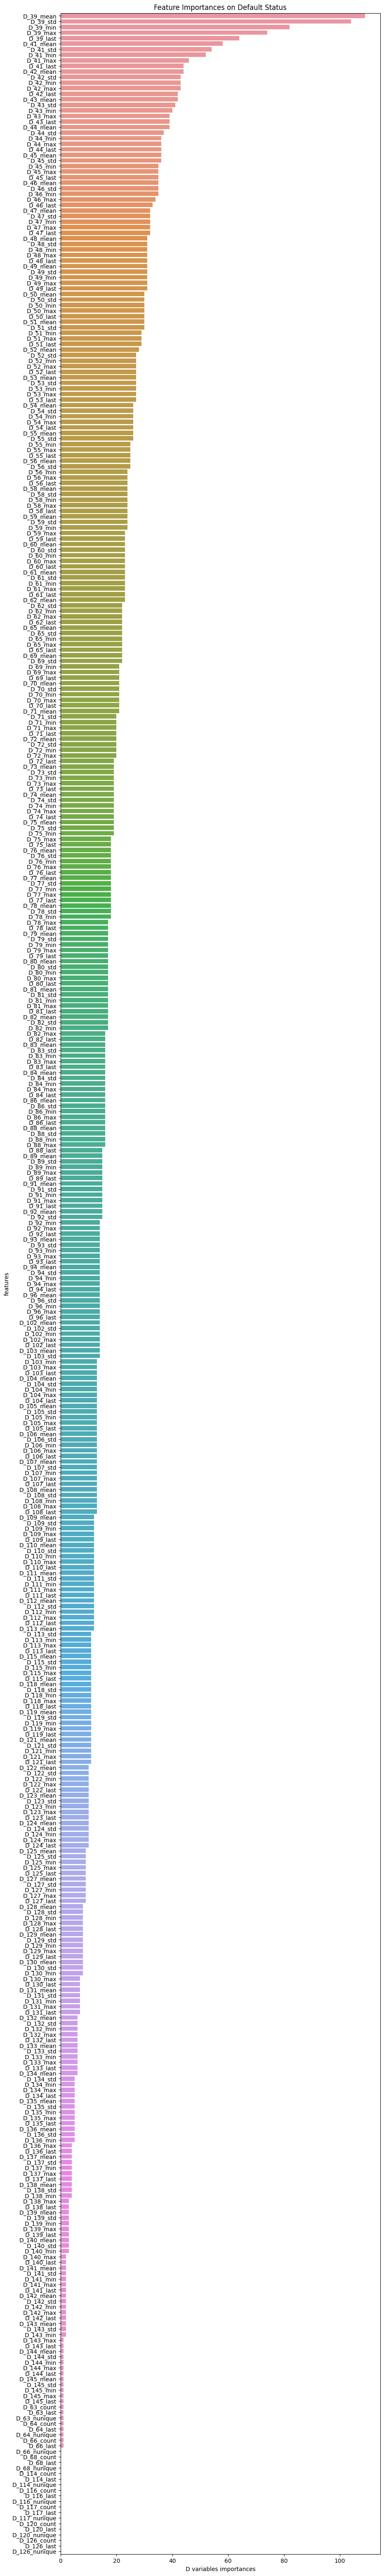

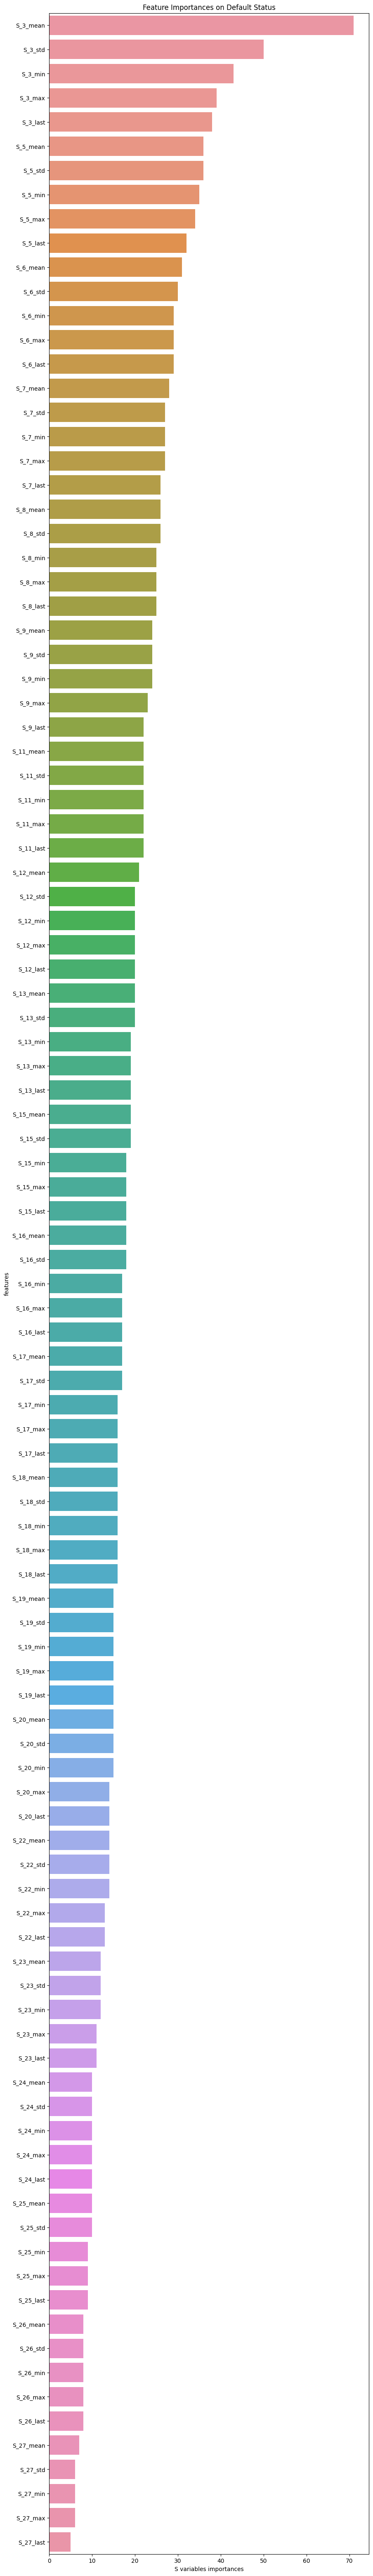

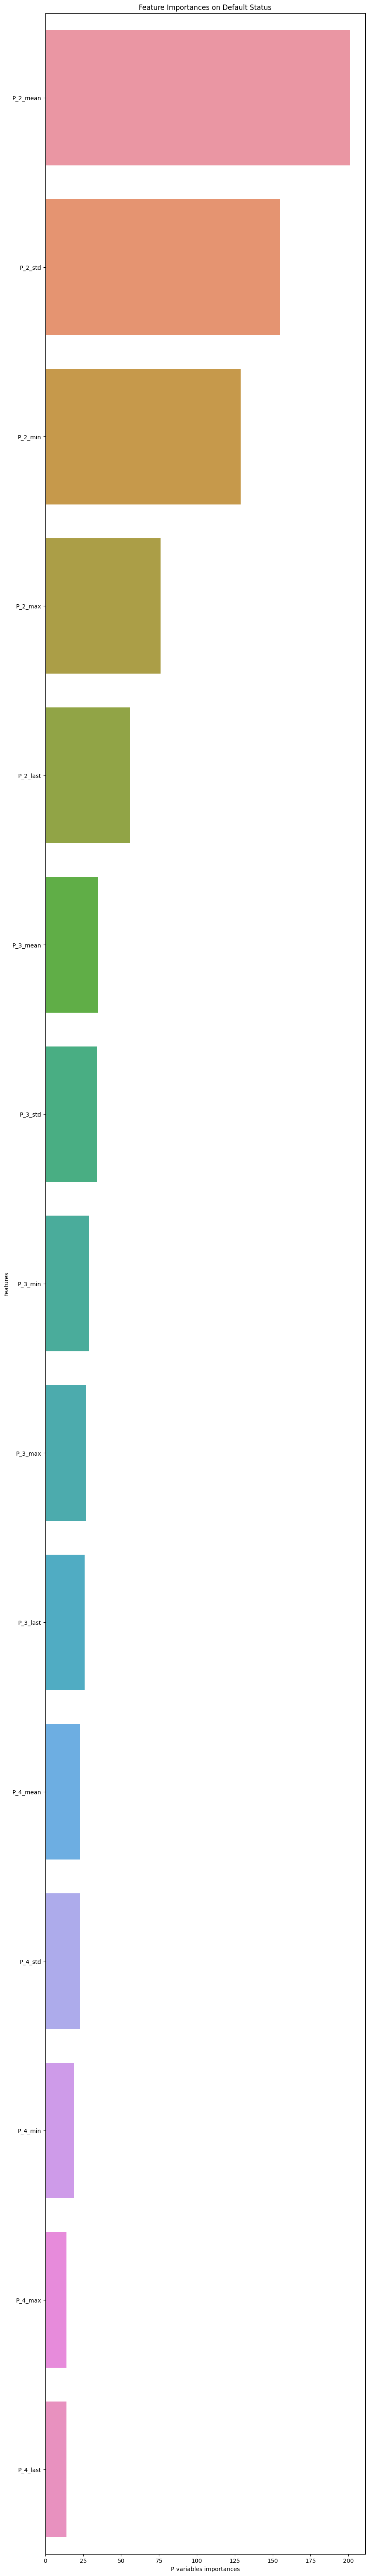

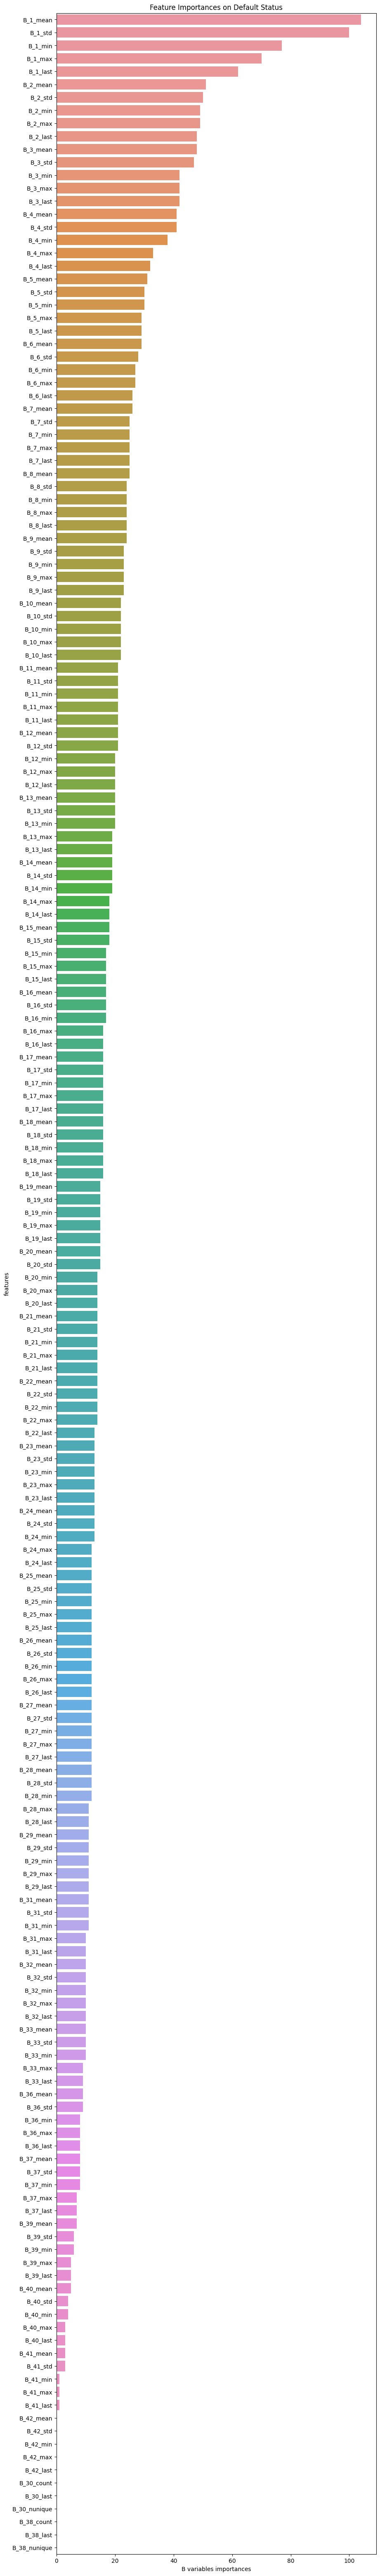

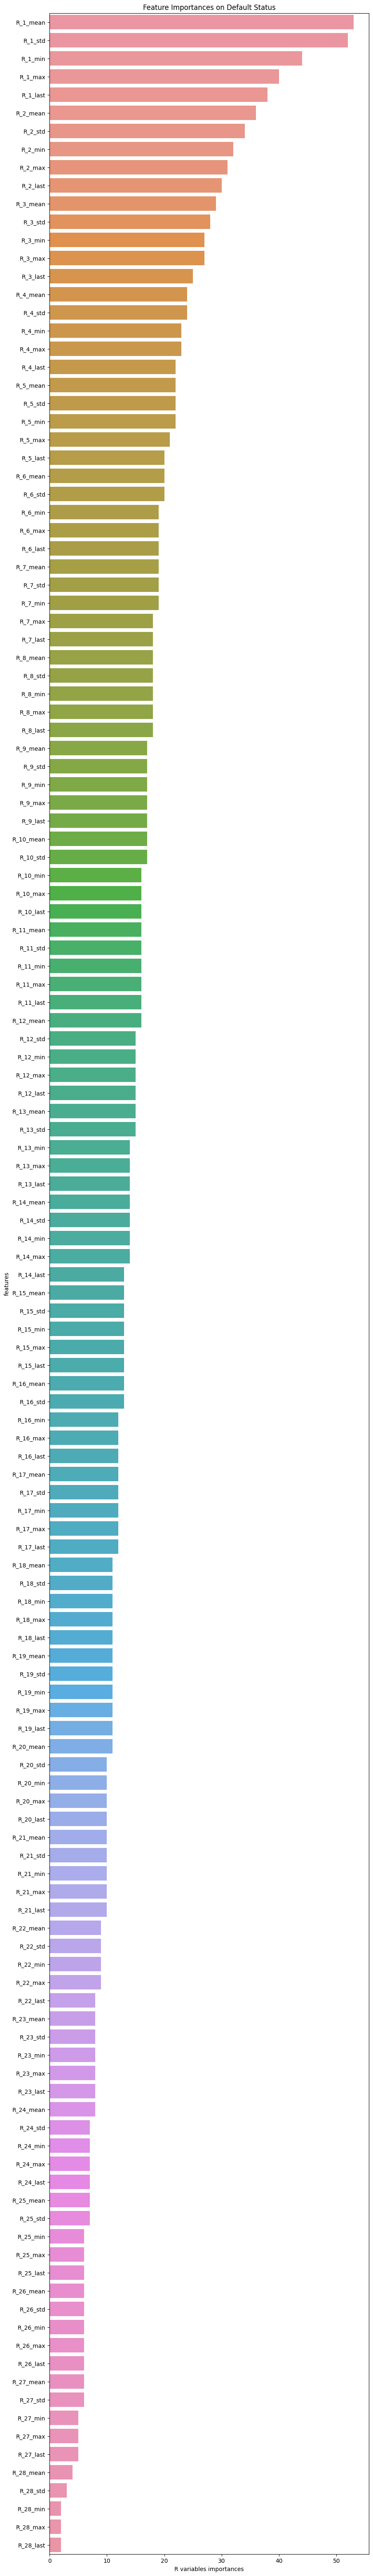

In [140]:
imp = pd.DataFrame(data=zip(X.columns, clf.feature_importances_), columns=['features','importances'])
imp.set_index('features',inplace=True)

for var in ['D','S','P','B','R']:
    df = imp.loc[(x for x in imp.index if var in x)]
    plt.figure(figsize=(10, 80))
    sns.barplot(x="importances", y=df.index, data=df.sort_values(by="importances", ascending=False))
    plt.xlabel(f'{var} variables importances')
    plt.title('Feature Importances on Default Status')
plt.show()

# 7. Submit the predictions

In [81]:
ids = test_df['customer_ID']
pred_df = test_df.copy().drop('customer_ID',axis=1)

predictions = pd.DataFrame({'customer_ID': ids, 'prediction': clf.predict_proba(pred_df)[:, 1]})
predictions.head()

customer_ID  prediction
0  00000469ba478561f23a92a868bd366de6f6527a684c9a...    0.028072
1  00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...    0.000905
2  0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...    0.067713
3  00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...    0.264068
4  00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...    0.866723

In [82]:
predictions.set_index('customer_ID',inplace=True)
predictions.to_csv('predictions.csv')